# Feature Selection 
> A tutorial on basic concepts related to Feature Selection 

- toc: true 
- badges: true
- comments: true
- categories: [machinelearning,featureengineering,featureselection,shap,xgbfir]
- image: images/Feature-Selection-Part-1.png

# Objective

1. Model Interpretation - Connecting the dots with Feature Selection
2. Motivation for Feature Selection.
3. Traditional and Novel Feature Selection Techniques.
4. Elimination of Noisy features using Correlation.
5. Indeitfy Relevant interactions and Feature Engineer Relevant Interactions.
6. Shap Based Automated Feature Selection.
7. Imabalnced Dataset - Check IID Principle in Train Test Split for better interpretation.
8. Framework to automate Feature Engineering Task.

# Model Interpretation

1. Model Interpretation or Explanation is not Causal Inference.i.e We cannot  draw a conclusion that a specific treatment (i.e., intervention) independent features(X) was the “cause” of the effect (or outcome)(Y) that was observed.
2. There are two types of explanations for Black Box Models:
  1. Global Explanations(will be the focus of this notebook.)
    1. It explains how does the output depend on the input feature for the whole dataset.
  2. Local Explanations
    1. It talks about a single datapoint and explains why a particular data point was classified in a particular way.
3. Explaining the model is not same as explaining the data.Model inspection only tells you about the model and the model might not accurately reflect the data.
4. First level of interpretation of the models is to look for feature importance to the model.It falls under the global explanation of the models umbrella.It is generally a naive way and should be handled with care.
5. For linear models(interpretable model), we can use coeff_ in scikit learn used for feature importance.
6. For tree based models,we can use feature_importances_ in scikit-learn for feature importance. 
7. Feature importance in the tree based models are a fast approximations but can be biased due to use of training set statistics. It generally captures the mean impurity decrease based on a feature on the training set when we fit the model.
8. There are better ways to calculating unbiased feature importances.For eg. Permutation Importance
9. For linear model coefficient:
  1. Relative importance only meaningful after scaling.
  2. Correlation among features might make coefficients completely uninterpretable.
  3. L1 regularization will pick one at random from a correlated group.
  4. Any penalty will invalidate usual interpretation of linear coefficients.






# Motivation for Feature Selection

1. Reduce overfitting and give better models.<br>
But based on my experience,I am not sure how much it is true in practice due to the following reasons:
  1. Mostly we add features in the model assuming it is important.And even if this feature is not important,most models can actually learn features which are not important. 
  2. Very rarely I found automatic feature selection improving the model accuracy.
2. Faster prediction and training.
3. Less storage for model and dataset.
4. More interpretable model.

# Feature Selection Strategies


Types of Feature Selection
1. Unsupervised vs Supervised
2. Univariate vs Multivariate
3. Model based or not

Unsupervised Techniques:
Points to Note:

1. May discard important information.
2. Variance-based: 0 variance or mostly constant features are dropped.
3. Covariance-based: remove correlated features,but in predictive modeling it might discard information.
4. PCA: remove linear subspaces instead of individual features in a way that it preserves as much of the information as possible.But downside is the feature is not interpretable.

Supervised Feature Selection

1. Univariate Statistic -- Pick Statisitic,check p-value
  1. Paramteric Methods,looks for linear relationship i.e coorelations
    1. f_regression
    2. f_classsif
    3. chi2
  2. Non parametric Methods,can works on non-linear relationships.
    1. Mutual Information - k-nearest neighbour based method

Model Based Feature Selection

  1. Single Fit 
    1. Fit the model once, select the feature important to the model.
    2. Use Coeff in case of Linear Models and feature importance in case of Tree Based Models.
    3. Use some heurisitc to find the best set of features.For eg. SelectFromModel in scikit-learn take the estimator and the strategy which could be either threshold on importance of the feature values or Percentile of features to consider.
    4. Might not give you the optimum set of features.

  2. Iterative Model Based Selection
    1. 1st Strategy - Fit model, find least important feature, remove, iterate.
      1. RFE - Recursive Feature Elimination
          1. Uses feature importances / coefficients, similar to “SelectFromModel” to remove a feature(s).
          2. Iteratively removes features (one by one or in groups)
          3. Runtime: (n_features - n_feature_to_keep) / stepsize
      2. RFECV - Recursive Feature Elimination with Cross Validation
          1. Uses cross validation score to find the best set of features to keep.

      3. Drop Feature Importance:<br>
  $I^i_{drop}$=$Acc(f,X,y)$−$Acc(f^′,X−i,y)$ <br>
      Importance of a feature  is calculated by comparing the drop in the accuracy when we train the model with and without the feature. 
          1. Cannot deal with correlated features well.For eg. Consider a case where we have two copies of a feature that is highly informative in the data,the model($f$) will pick one of the feature and has a very high accuracy.When we drop this feature in model($f^{'}$) the other feature would try to fill in and accuracy would still be higher and hence the the drop feature importance will be lower as the other feature will compensate for it. As a result , this technique will not tell us which feature to use in the model.
          2. It explains more about the data and less about the model.  
          3. Can be used for the feature selection in case of non correlated features.
          4. Very slow due to retraining of the model.

      4. Permutation Importance: <br>
  $I^{perm}_i=Acc(f,X,y)−E_{x_i}[Acc(f(x_i,X_{−i}),y)]$ <br>
        Measure Marginal Influence of one feature.<br>
        It tries to answer how much the model relies on each features. 

          1. Instead of replacing a feature,we replace it with an uninformative variant by shuffling the feature values without considering other feature values.This helps in destroying any relation that this feature has with the target variable but retaining the data distribution. 
          2. Faster than Drop Feature Importance as no refitting of the model on the training data,but applied on validation set given trained estimator.
    2. 2nd Strategy - Start with single feature, find most important feature, add, iterate.
      1. Wrapper Methods
          1. Called Forward or Backward selection.
          2. Use cross validation score to select or drop a feature.
          2. Complexity: n_features * (n_features + 1) / 2



# Getting the dataset

In [1]:
! mkdir ~/.kaggle

In [2]:
! cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install  kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           8992        278  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           4657        152  0.9705882        
mohamedharris/supermart-grocery-sales-retail-analytics-dataset  Supermart Grocery Sales - Retail Analytics Dataset  191KB  2022-06-12 16:14:44            607         39  0.88235295       
sameepvani/nasa-nearest-earth-objects                       

In [5]:
!kaggle competitions download -c santander-customer-satisfaction

 61% 5.00M/8.25M [00:00<00:00, 39.1MB/s]
100% 8.25M/8.25M [00:00<00:00, 16.0MB/s]


In [6]:
!ls

drive  sample_data  santander-customer-satisfaction.zip


In [7]:
!unzip -q santander-customer-satisfaction.zip

In [8]:
!ls

drive	     sample_submission.csv		  test.csv
sample_data  santander-customer-satisfaction.zip  train.csv


In [9]:
import numpy as np
import pandas as pd

In [10]:
!pip3 install pydotplus
!pip3 install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip3 install probatus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 8.0 MB/s 
     |████████████████████████████████| 352 kB 37.8 MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490560 sha256=e7493c3b0a2d97a039e0e7268a039d6e3b510b6404bbcbcb20cb3c557ea609b6
  Stored in directory: /root/.cache/pip/wheels/34/33/98/2c03c2e06312e616f7a8dad3fbbcc78fc9eb1d665abcef1060
Successfully built shap


In [12]:
import numpy as np
import pandas as pd
import scipy
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
!pip3 install yellowbrick==1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 27.9 MB/s 
     |████████████████████████████████| 14.8 MB 63.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 1.4
    Uninstalling yellowbrick-1.4:
      Successfully uninstalled yellowbrick-1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatib

In [14]:
!pip3 install graphviz
!apt-get install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [15]:
from pydotplus import graph_from_dot_data
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [16]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, \
recall_score, precision_score, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score,\
cross_validate
from sklearn.inspection import permutation_importance
from sklearn.model_selection import StratifiedKFold
pd.set_option('display.float_format',lambda x: '%.3f'%x)

## Data Prep

In [17]:
data = pd.read_csv("train.csv")
data.shape

(76020, 371)

In [18]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,39205.170,0
1,3,2,34,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,49278.030,0
2,4,2,23,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,67333.770,0
3,8,2,37,0.000,195.000,195.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,64007.970,0
4,10,2,39,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,117310.979,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [20]:
X = data.drop("TARGET",axis=1)

In [21]:
Y = data.TARGET

## Check for Imbalanced Dataset

Dataset is highly imbalanced

In [22]:
np.bincount(Y)/len(Y)

array([0.96043147, 0.03956853])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X,_,Y,_ = train_test_split(X,Y, train_size = 0.3,stratify=Y,random_state = 123)

In [25]:
X = X.reset_index(drop = True)
Y = Y.reset_index(drop=True)

In [26]:
X.shape

(22806, 370)

# Univariate Feature Selection

### Variance Threshold

Removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

s an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by


Let's remove the features that have the same value in all samples i.e with zero variance and keep features with non zero variance

In [27]:
from sklearn.feature_selection import VarianceThreshold

In [28]:
len(X.columns)

370

In [29]:
sel = VarianceThreshold()
sel.fit(X)

VarianceThreshold()

In [30]:
len(sel.get_feature_names_out())

308

In [31]:
feats_with_zero_var = X.columns[~sel.get_support()]
feats_with_zero_var

Index(['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio',
       'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28',
       'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46',
       'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18',
       'num_op_var40_hace3', 'num_var27_0', 'num_var28_0', 'num_var28',
       'num_var27', 'num_var41', 'num_var46_0', 'num_var46',
       'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27',
       'saldo_var41', 'saldo_var46', 'delta_imp_amort_var18_1y3',
       'delta_imp_trasp_var33_out_1y3', 'delta_num_trasp_var33_out_1y3',
       'imp_amort_var18_hace3', 'imp_amort_var18_ult1',
       'imp_amort_var34_hace3', 'imp_reemb_var13_hace3',
       'imp_reemb_var33_hace3', 'imp_trasp_var17_in_hace3',
       'imp_trasp_var17_out_hace3', 'imp_trasp_var33_in_ult1',
       'imp_trasp_var33_out_hace3', 'imp_trasp_var33_out_ult1',
       'imp_venta_var44_hace3', 'num_var2_0_ult1', 'num_var2_ult1',


We can check for one feature by counting the unique values.

In [32]:
X['ind_var2_0'].value_counts()

0    22806
Name: ind_var2_0, dtype: int64

In [33]:
print(f'Percentage of 0\'s {(X["ind_var2_0"].value_counts()/len(X)*100).values}')

Percentage of 0's [100.]


We can check for all the features with zero variance

In [34]:
X[feats_with_zero_var].value_counts().to_frame()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0
ind_var2_0,ind_var2,ind_var13_medio_0,ind_var13_medio,ind_var18_0,ind_var18,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var41,ind_var46_0,ind_var46,num_var13_medio_0,num_var13_medio,num_var18_0,num_var18,num_op_var40_hace3,num_var27_0,num_var28_0,num_var28,num_var27,num_var41,num_var46_0,num_var46,saldo_var13_medio,saldo_var18,saldo_var28,saldo_var27,saldo_var41,saldo_var46,delta_imp_amort_var18_1y3,delta_imp_trasp_var33_out_1y3,delta_num_trasp_var33_out_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_reemb_var13_hace3,imp_reemb_var33_hace3,imp_trasp_var17_in_hace3,imp_trasp_var17_out_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,num_var2_0_ult1,num_var2_ult1,num_meses_var13_medio_ult3,num_reemb_var13_hace3,num_reemb_var33_hace3,num_trasp_var17_in_hace3,num_trasp_var17_out_hace3,num_trasp_var33_in_ult1,num_trasp_var33_out_hace3,num_trasp_var33_out_ult1,num_venta_var44_hace3,saldo_var2_ult1,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var29_hace3,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0,0.000,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0,0,0.000,0.000,22806


In [35]:
X = X.drop(feats_with_zero_var,axis=1)
X.shape

(22806, 308)

Reduced the feature set from 370 to 336.


In [36]:
from sklearn.feature_selection import GenericUnivariateSelect, f_classif, mutual_info_classif

In [37]:
def GenericUnivariateSelect_(score_fnc, X,y):
    selector = GenericUnivariateSelect(score_fnc)
    selector.fit(X,y)
    if score_fnc.__name__ == 'f_classif':
      scores = -np.log10(selector.pvalues_)
      scores /= scores.max()
      #-Log(p-score)
      univariate_cols = list(zip(X.columns,selector.pvalues_))
      uni_df = pd.DataFrame(univariate_cols,columns = ['f_names','neg_log_pvalue']).sort_values(by = 'neg_log_pvalue',ascending=False)
      uni_df.plot('f_names', 'neg_log_pvalue', 'barh', figsize=(12,X.shape[1]/4.2), legend=False)
    else:
      scores = selector.scores_
      univariate_cols = list(zip(X.columns,selector.scores_))
      uni_df = pd.DataFrame(univariate_cols,columns = ['f_names','mutual_info']).sort_values(by = 'mutual_info',ascending=False)
      uni_df.plot('f_names', 'mutual_info', 'barh', figsize=(12,X.shape[1]/4.2), legend=False)

    return uni_df

,f_names,mutual_info
117,num_var30,0.016
234,num_meses_var5_ult3,0.015
2,var15,0.014
126,num_var35,0.014
54,ind_var30,0.013
136,num_var42,0.013
154,saldo_var30,0.013
76,num_var4,0.012
78,num_var5,0.012
23,ind_var5,0.012


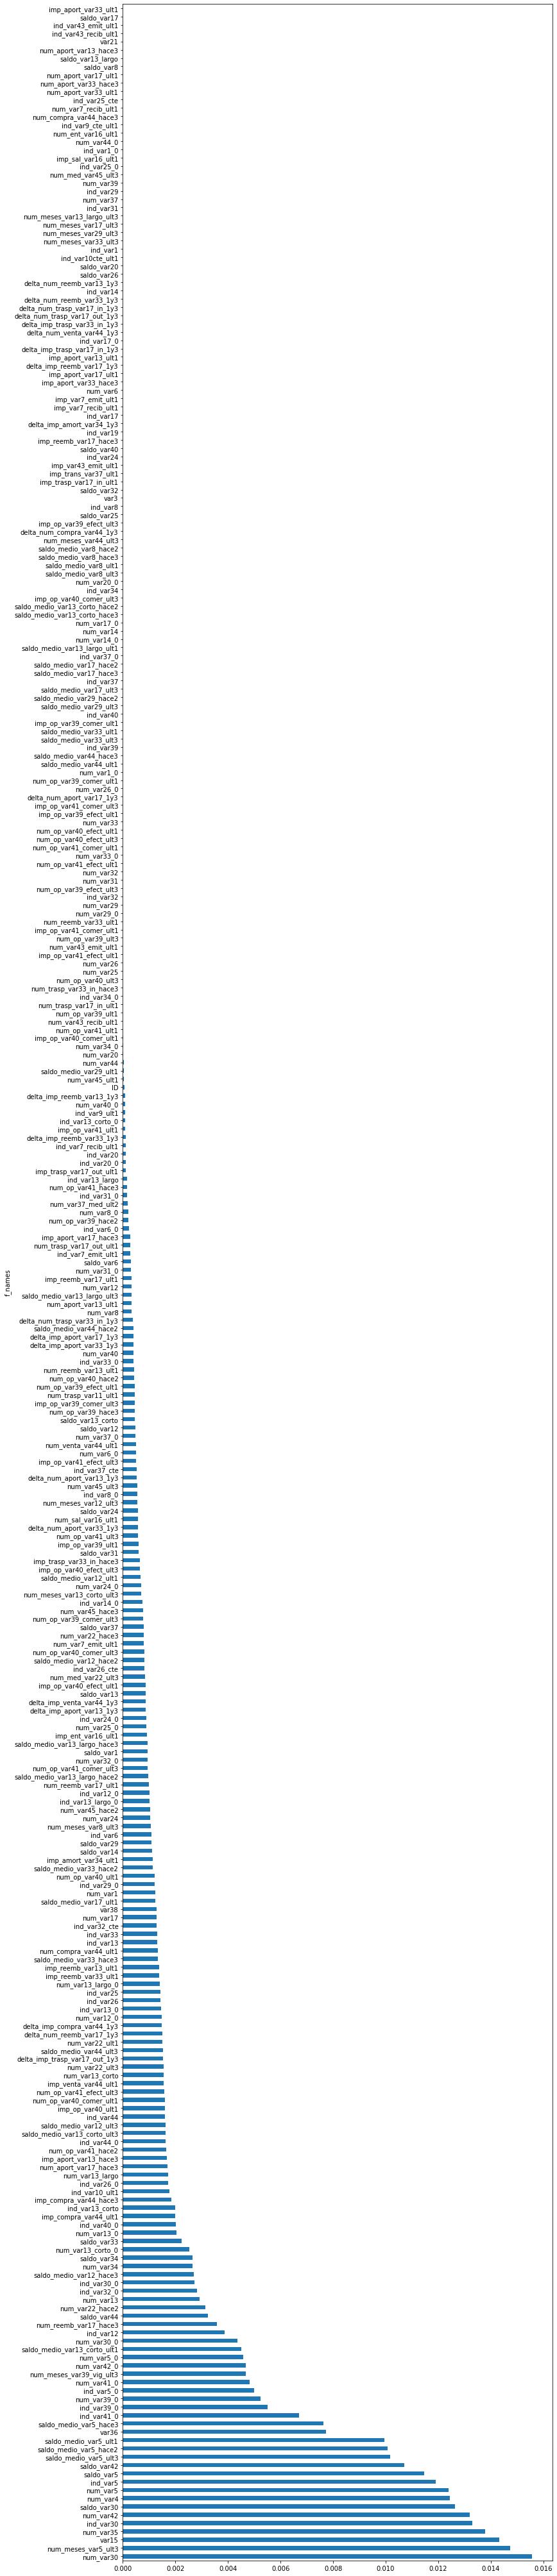

In [38]:
scores = GenericUnivariateSelect_(mutual_info_classif,X,Y)
scores[:10]

We can keep subset of features based on different methods.
1. Percentile
2. Topk

In [39]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_classif, k=50)
X_reduced = selector.fit_transform(X, Y)
X_reduced.shape


(22806, 50)

In [40]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
print(selected_columns[:5])


['var15', 'imp_ent_var16_ult1', 'imp_op_var39_efect_ult3', 'ind_var5_0', 'ind_var5']


Reducing the feature set to 50 for faster execution of the cells. Feel free to continue all the features to the next steps.

In [41]:
X = X[selected_columns]
X.shape

(22806, 50)

## Tree Model Rules

In [42]:
np.random.seed(123)
tree=DecisionTreeClassifier(class_weight='balanced',max_depth=3)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [43]:
dot_data = export_graphviz(tree,filled = True,rounded = True,
                          class_names = ["0", "1"],
                          feature_names = X.columns,
                          out_file  =None)

In [44]:
graph = graph_from_dot_data(dot_data)

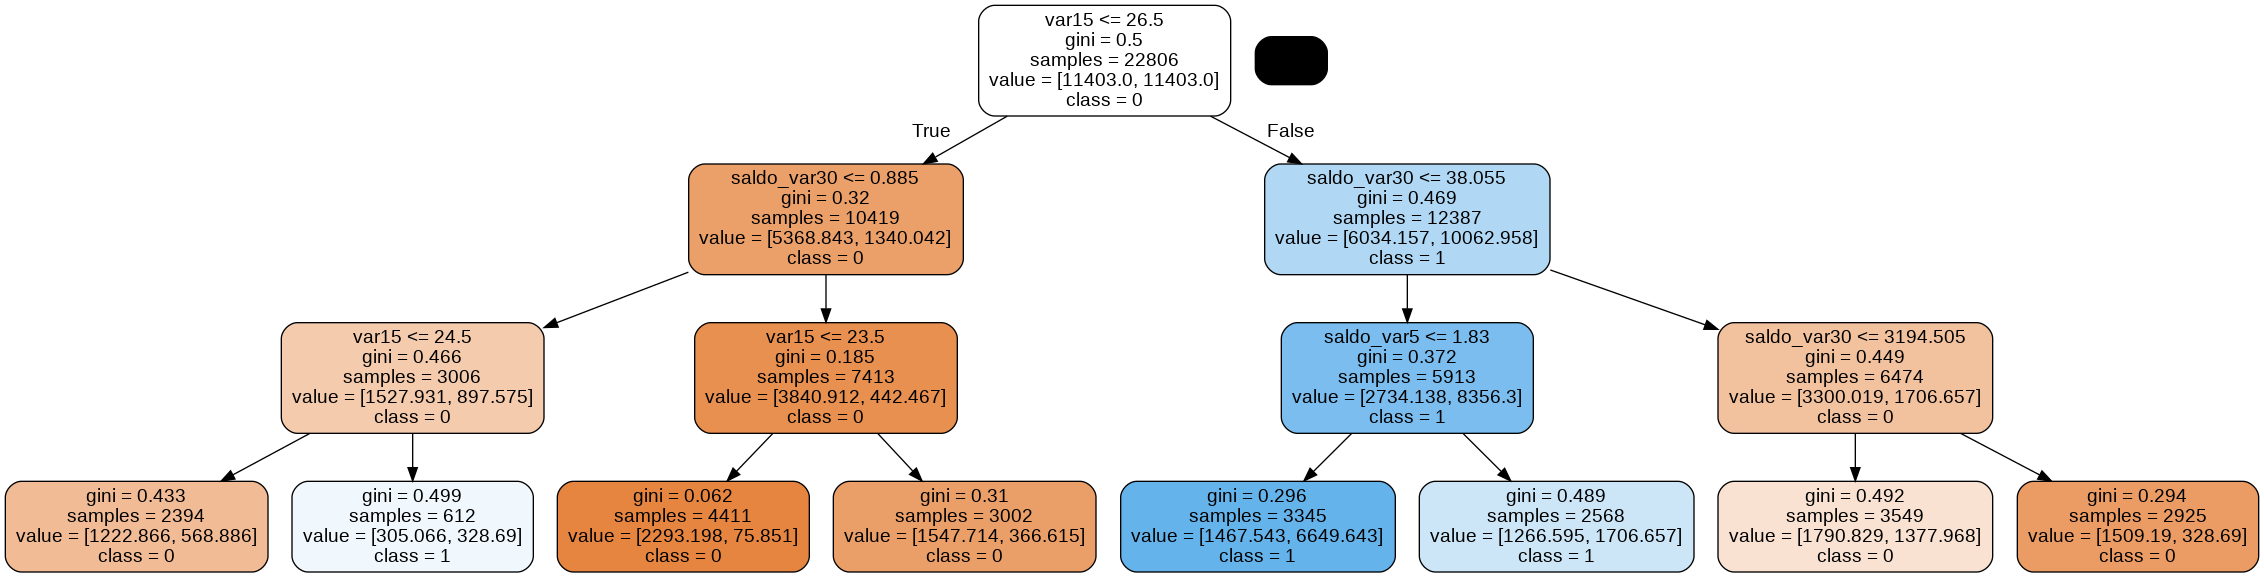

In [45]:
graph.write_png('tree.png')
from IPython.display import Image
Image('tree.png',height =800,width = 2000)

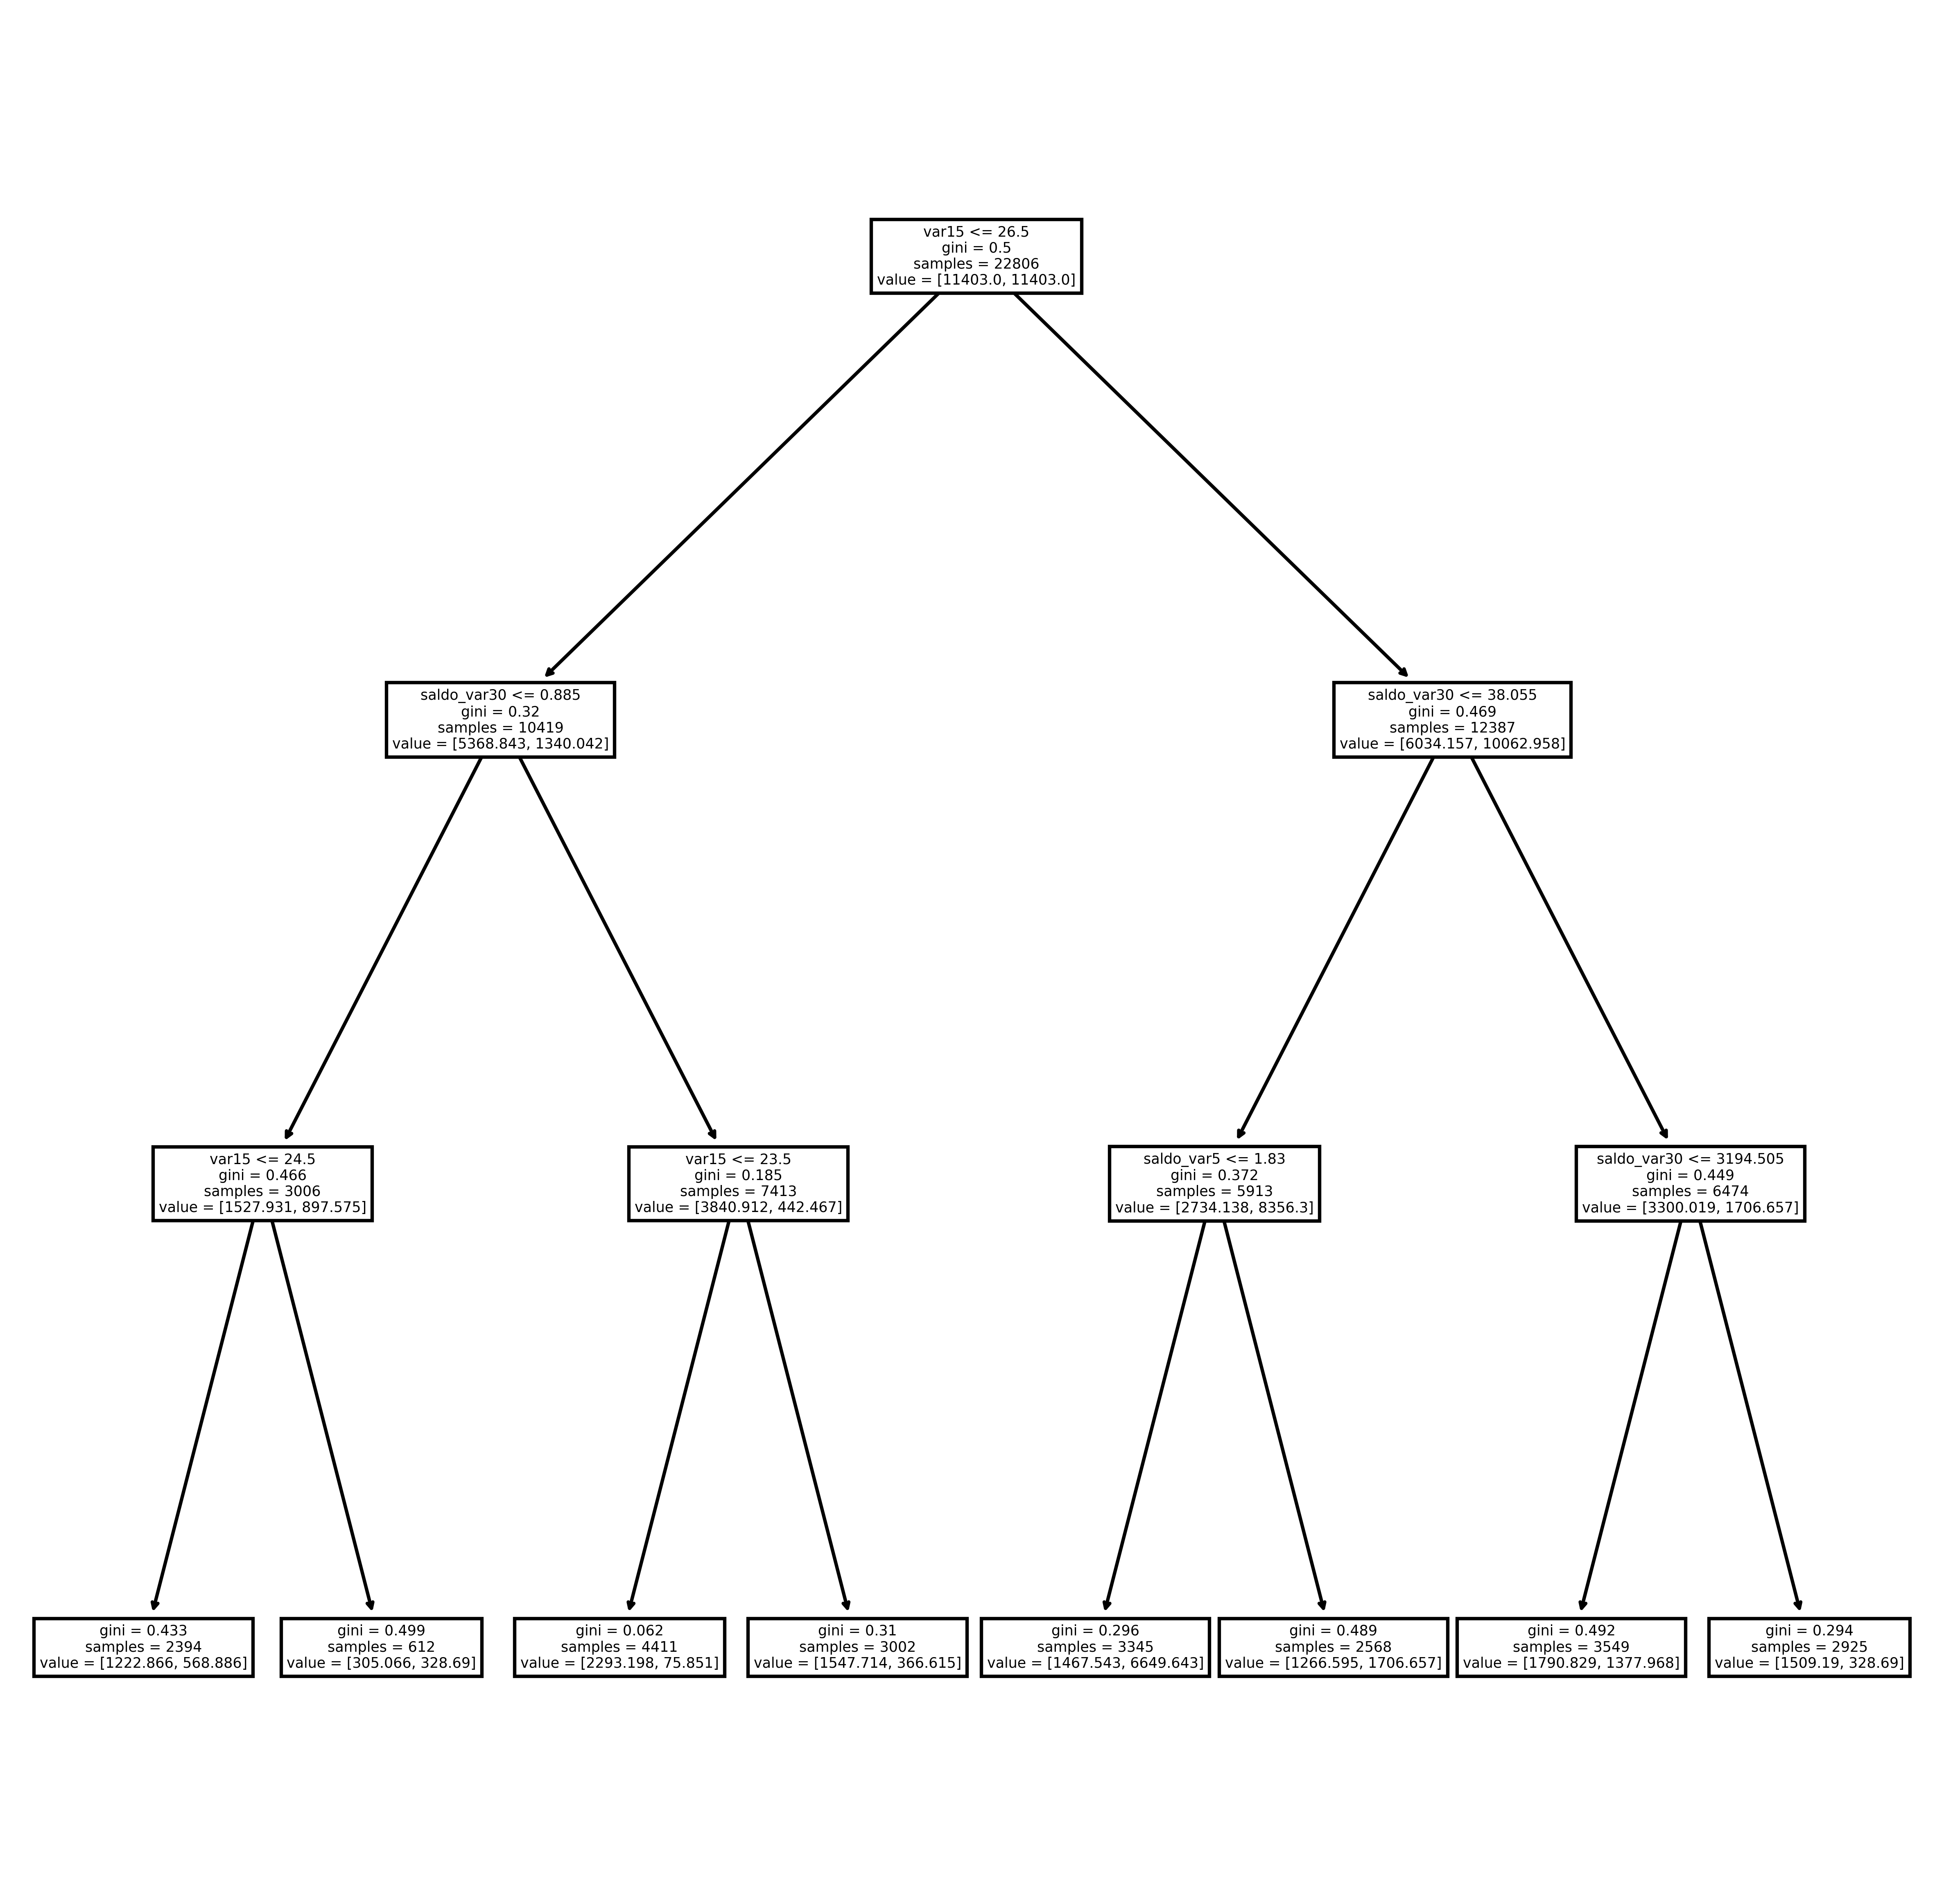

In [46]:
plt.figure(figsize=(10, 10), dpi=600)
tree_dot = plot_tree(tree, feature_names=X.columns)

In [47]:
scorer_f1 = make_scorer(f1_score, greater_is_better=True)
scorer_auc = make_scorer(roc_auc_score, greater_is_better=True)
scorer_avg_precision = make_scorer(average_precision_score, greater_is_better=True)
scorer_precision = make_scorer(precision_score, greater_is_better=True)
scorer_recall = make_scorer(recall_score, greater_is_better=True)

In [48]:
score = {'f1' :scorer_f1,
        'auc' :scorer_auc,
        'avg_prec' : scorer_avg_precision,
        'recall' : scorer_recall,
        'precision': scorer_precision}

In [49]:
np.random.seed(123)
model = RandomForestClassifier(n_estimators = 100,class_weight='balanced',
                               min_samples_leaf=3,
                              criterion ='gini')


In [50]:
# 10 fold cross validation
cv_score = cross_validate(model, 
                           X,
                           Y,
                           cv = StratifiedKFold(10,shuffle=True,random_state=123),
                            scoring =score)

In [51]:
pd.DataFrame(cv_score)

,fit_time,score_time,test_f1,test_auc,test_avg_prec,test_recall,test_precision
0,1.942,0.055,0.265,0.740,0.118,0.600,0.170
1,1.789,0.053,0.266,0.736,0.117,0.589,0.172
2,1.760,0.054,0.214,0.678,0.086,0.478,0.138
3,1.758,0.055,0.228,0.706,0.096,0.544,0.144
4,3.307,0.059,0.215,0.694,0.090,0.527,0.135
5,2.530,0.054,0.226,0.691,0.093,0.505,0.146
6,1.801,0.053,0.241,0.723,0.105,0.578,0.152
7,1.781,0.055,0.243,0.716,0.104,0.556,0.155
8,1.778,0.053,0.236,0.705,0.099,0.533,0.151
9,1.787,0.056,0.223,0.700,0.093,0.533,0.141


In [52]:
model.fit(X,Y)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=3)

## Random Forest Model Importance

In [53]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'features':df.columns, 'importance':m.feature_importances_}).sort_values('importance', ascending=False)

In [54]:
#Feature Importance
fi=rf_feat_importance(model,X);fi[:30]

,features,importance
0,var15,0.258
30,saldo_var30,0.081
47,saldo_medio_var5_ult3,0.073
45,saldo_medio_var5_hace3,0.072
32,saldo_var42,0.059
44,saldo_medio_var5_hace2,0.046
27,saldo_var5,0.046
46,saldo_medio_var5_ult1,0.041
9,ind_var30,0.035
39,num_meses_var5_ult3,0.025


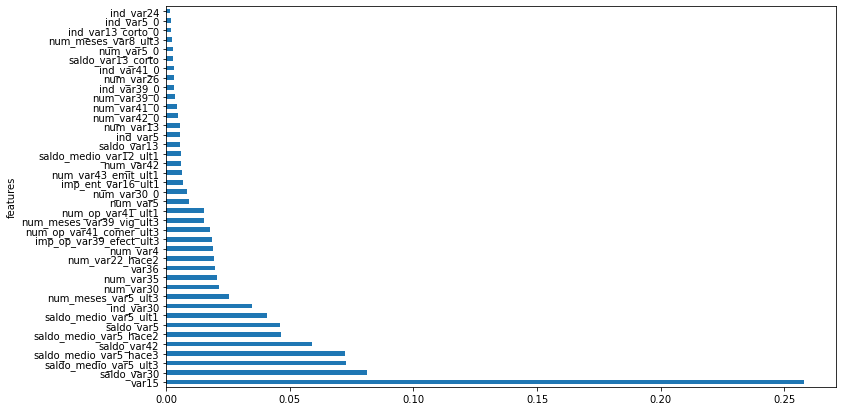

In [55]:
def plot_fi(fi): return fi.plot('features', 'importance', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:40]);

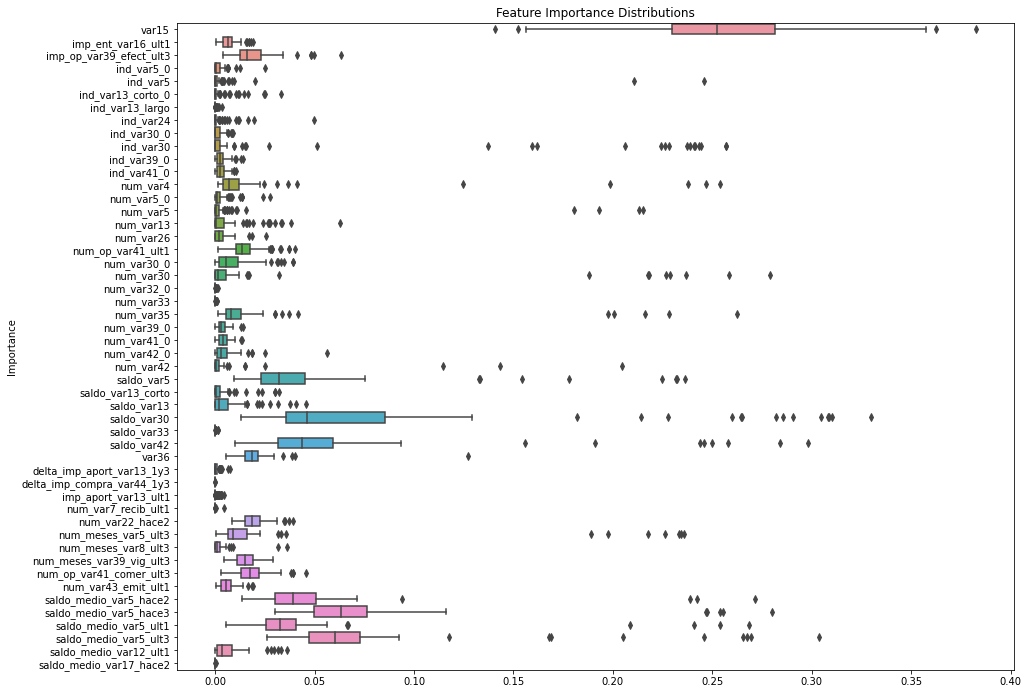

In [56]:
# get the feature importances from each tree and then visualize the
# distributions as boxplots
plt.figure(figsize=(15,X.shape[1]/4.2))
all_feat_imp_df = pd.DataFrame(data=[tree.feature_importances_ for tree in 
                                     model],
                               columns=X.columns)

(sns.boxplot(data=all_feat_imp_df,orient="h")
        .set(title='Feature Importance Distributions',
             ylabel='Importance'));

### Mean Threshold

In [57]:
from sklearn.feature_selection import SelectFromModel

In [58]:
rf_select_mean = SelectFromModel(model).fit(X,Y)
print(rf_select_mean.threshold_)
cols = X.columns
rf_cols_to_keep_mean = rf_select_mean.get_support()
rf_cols_to_keep_mean = cols[rf_cols_to_keep_mean]
rf_cols_to_keep_mean = list(rf_cols_to_keep_mean) 
print(f'Features Dropped: \n {set(X.columns).difference(set(rf_cols_to_keep_mean))}\n')
print(f'Features Selected[{len(rf_cols_to_keep_mean)}]:\n {rf_cols_to_keep_mean}\n')

0.02
Features Dropped: 
 {'ind_var5', 'saldo_medio_var17_hace2', 'num_meses_var39_vig_ult3', 'num_var5_0', 'imp_op_var39_efect_ult3', 'num_var13', 'delta_imp_compra_var44_1y3', 'num_var7_recib_ult1', 'ind_var5_0', 'num_meses_var8_ult3', 'num_var41_0', 'saldo_medio_var12_ult1', 'num_var32_0', 'num_var39_0', 'num_var35', 'delta_imp_aport_var13_1y3', 'num_var22_hace2', 'ind_var13_largo', 'saldo_var13_corto', 'ind_var24', 'num_var42_0', 'num_var42', 'imp_aport_var13_ult1', 'num_var5', 'num_var33', 'imp_ent_var16_ult1', 'num_var43_emit_ult1', 'num_op_var41_comer_ult3', 'ind_var39_0', 'saldo_var33', 'num_var30_0', 'ind_var13_corto_0', 'num_var26', 'ind_var41_0', 'saldo_var13', 'num_op_var41_ult1', 'ind_var30_0'}

Features Selected[13]:
 ['var15', 'ind_var30', 'num_var4', 'num_var30', 'saldo_var5', 'saldo_var30', 'saldo_var42', 'var36', 'num_meses_var5_ult3', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3']



### Feature Importance Threshold

In [59]:
rf_select_thresh = SelectFromModel(model,threshold=0.005).fit(X,Y)
print(rf_select_thresh.threshold_)
cols = X.columns
rf_cols_to_keep_thresh = rf_select_thresh.get_support()
rf_cols_to_keep_thresh = cols[rf_cols_to_keep_thresh]
rf_cols_to_keep_thresh = list(rf_cols_to_keep_thresh)
print(f'Features Dropped: \n {set(X.columns).difference(set(rf_cols_to_keep_thresh))}\n')
print(f'Features Selected[{len(rf_cols_to_keep_thresh)}]:\n {rf_cols_to_keep_thresh}\n')

0.005
Features Dropped: 
 {'ind_var5', 'saldo_medio_var17_hace2', 'num_var5_0', 'num_var13', 'delta_imp_compra_var44_1y3', 'num_var7_recib_ult1', 'ind_var5_0', 'num_meses_var8_ult3', 'num_var41_0', 'num_var32_0', 'num_var39_0', 'delta_imp_aport_var13_1y3', 'ind_var13_largo', 'saldo_var13_corto', 'ind_var24', 'imp_aport_var13_ult1', 'num_var33', 'ind_var39_0', 'saldo_var33', 'ind_var13_corto_0', 'num_var26', 'ind_var41_0', 'saldo_var13', 'ind_var30_0'}

Features Selected[26]:
 ['var15', 'imp_ent_var16_ult1', 'imp_op_var39_efect_ult3', 'ind_var30', 'num_var4', 'num_var5', 'num_op_var41_ult1', 'num_var30_0', 'num_var30', 'num_var35', 'num_var42_0', 'num_var42', 'saldo_var5', 'saldo_var30', 'saldo_var42', 'var36', 'num_var22_hace2', 'num_meses_var5_ult3', 'num_meses_var39_vig_ult3', 'num_op_var41_comer_ult3', 'num_var43_emit_ult1', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3', 'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'saldo_medio_var12_ult1']



Further dropping the features based on Threshold


In [77]:
X = X[rf_cols_to_keep_thresh]
X.shape

(22806, 25)

# RFECV

In [109]:
from sklearn.feature_selection import RFECV

In [65]:
def RFECV_(rfcev_obj,X,Y,scorer_name = None,rs = 123):
    np.random.seed(rs)
    rfcev_obj.fit(X,Y)
    plt.plot(rfcev_obj.grid_scores_);
    plt.xlabel('Number of Features'); plt.ylabel(f'{scorer_name}'); plt.title('Feature Selection Scores');
    sel_cols = X.columns[rfcev_obj.support_]
    ranking_cols = sorted(list(zip(rfcev_obj.ranking_,X.columns)),key = lambda x: x[0])
    print(sel_cols)
    print(len(sel_cols))
    return sel_cols, ranking_cols

The “support_” attribute reports true or false as to which features in order of column index were included and the “ranking_” attribute reports the relative ranking of features in the same order.

In [ ]:
# Create a model for feature selection
estimator = RandomForestClassifier(random_state = 10,
                                   n_estimators = 100,
                                   n_jobs = -1,
                                   oob_score=True,
                                   criterion='gini',
                                   max_features=0.8,
                                   class_weight='balanced')

# Create the object
selector_avg_precision = RFECV(estimator, step = 1, cv = StratifiedKFold(10), scoring = scorer_avg_precision, n_jobs = -1)

Index(['var15', 'saldo_var30', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult3'],
      dtype='object')
4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


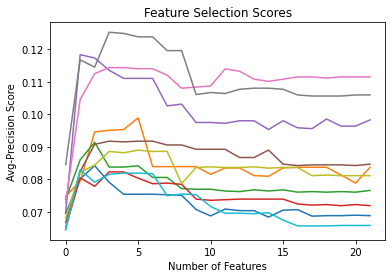

In [ ]:
_,_ = RFECV_(selector_avg_precision,
                X[rf_cols_to_keep_thresh],
                Y,
                'Avg-Precision Score')

# RFECV using Multiple Models

There are many algorithms that can be used in the core RFECV, as long as they provide some indication of variable importance.

Most decision tree algorithms are likely to report the same general trends in feature importance, but this is not guaranteed. It might be helpful to explore the use of different algorithms wrapped by RFE

In [62]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [ ]:
# # get a list of models to evaluate
# def get_models():
#     models = dict()
#     # lr
#     rfe = RFECV(estimator=LogisticRegression(class_weight = 'balanced'),
#                 step = 1,
#                cv = StratifiedKFold(10),
#                scoring = scorer_f1)
    
#     models['lr'] = Pipeline(steps=[('std', StandardScaler()),('lr',rfe)])
    
    
#     rfe = RFECV(estimator=Perceptron(class_weight = 'balanced'),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
    
#     models['perc'] = Pipeline(steps=[('min-max', MinMaxScaler()),('perc',rfe)])
    
#     # cart
#     rfe = RFECV(estimator=DecisionTreeClassifier(class_weight = 'balanced'),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
#     models['tree'] = Pipeline(steps=[('tree',rfe)])
    
    
#     # rf
#     rfe = RFECV(estimator=RandomForestClassifier(class_weight = 'balanced',criterion ='entropy'),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
#     models['rf'] = Pipeline(steps=[('rf',rfe)])
    
#     # gbm
#     rfe = RFECV(estimator=GradientBoostingClassifier(),
#                step = 1,
#                     cv = StratifiedKFold(10), 
#                     scoring = scorer_f1)
#     models['gbm'] = Pipeline(steps=[('gbm',rfe)])
#     return models

In [ ]:
# def RFECV_pipe_(rfcev_obj,model_name,X,Y,scorer_name = None,rs = 123):
#     np.random.seed(rs)
#     rfcev_obj.fit(X,Y)
#     fig , ax = plt.subplots(figsize = (12,8))
#     ax.plot(rfcev_obj[model_name].grid_scores_);
#     ax.set_xlabel('Number of Features'); ax.set_ylabel(f'{scorer_name}'); ax.set_title(f'RFECV-{model_name}');
#     sel_cols = X.columns[rfcev_obj[model_name].support_]
#     ranking_cols = sorted(list(zip(rfcev_obj[model_name].ranking_,X.columns)),key = lambda x: x[0])
#     print(sel_cols)
#     print(len(sel_cols))
#     return sel_cols, ranking_cols, fig

In [ ]:
# models = get_models()
# for model_name, obj in models.items():
#     sel_cols, ranking_cols, fig = RFECV_pipe_(obj,model_name,X,Y,"F1-score")
#     rank_df = pd.DataFrame(ranking_cols,columns = ['rank','f_name'])

# RFECV using D-Tree Models


In [107]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFECV(estimator=LogisticRegression(class_weight = 'balanced'),
                step = 1,
               cv = StratifiedKFold(10),
               scoring = scorer_f1)
    
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['lr_tree'] = Pipeline(steps=[('std', StandardScaler()),('s',rfe),('m',model)])
    
    # perceptron
    rfe = RFECV(estimator=Perceptron(class_weight = 'balanced'),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['per_tree'] = Pipeline(steps=[('min-max', MinMaxScaler()),('s',rfe),('m',model)])
    
    # cart
    rfe = RFECV(estimator=DecisionTreeClassifier(class_weight = 'balanced'),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['tree_tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    
    # rf
    rfe = RFECV(estimator=RandomForestClassifier(class_weight = 'balanced',criterion ='entropy'),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['rf_tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    
    # gbm
    rfe = RFECV(estimator=GradientBoostingClassifier(),
               step = 1,
                    cv = StratifiedKFold(10), 
                    scoring = scorer_f1)
    model = DecisionTreeClassifier(class_weight = 'balanced')
    models['gbm_tree'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y,scoring = 'accuracy'):
    cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1,return_estimator = True)
    return scores

In [74]:
def rfecv_comparision(models,X,y,score):
    results, names = list(), list()
    scores = dict()
    for name, model in models.items():
        print(f'RFECV feature selection starting with {name}')
        results = evaluate_model(model, X,Y,score)
        results_score = {key:values for key,values in results.items() if key.startswith('test')}
        scores[name] = results_score

    #no_metrics = [len(val) for val in scores.values()][0]
    metric_names = list([val.keys() for val in scores.values()][0])


    plot_scores = list()
    model_names = scores.keys()
    for i in metric_names:
        sc = []
        sc = [values[i] for key, values in scores.items()]
        plot_scores.append(sc)
    return plot_scores,metric_names,model_names
    

In [73]:
def create_rfecv_df(plot_scores,metric_names,model_names):
    df = pd.DataFrame()
    for index,i in enumerate(plot_scores):
        #print(i)
        temp = pd.DataFrame(i)
        temp['metric'] = metric_names[index]
        temp['model'] = model_names
        df = pd.concat([df,temp])
    return df

In [72]:
def rfecv_plot(plot_scores,model_names,metric_names):

    a = len(plot_scores)  # number of rows
    b = 1  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=(10,22))
    for i in range(0,len(plot_scores)): # no of folds in split

        ax = plt.subplot(a, 1, c)
        plt.boxplot(plot_scores[i],showmeans = True,labels = model_names);
        plt.title(f' {metric_names[i]}')
        plt.xlabel('Algorithms')
        plt.tight_layout(pad =2)
        c=c+1
        
    return fig

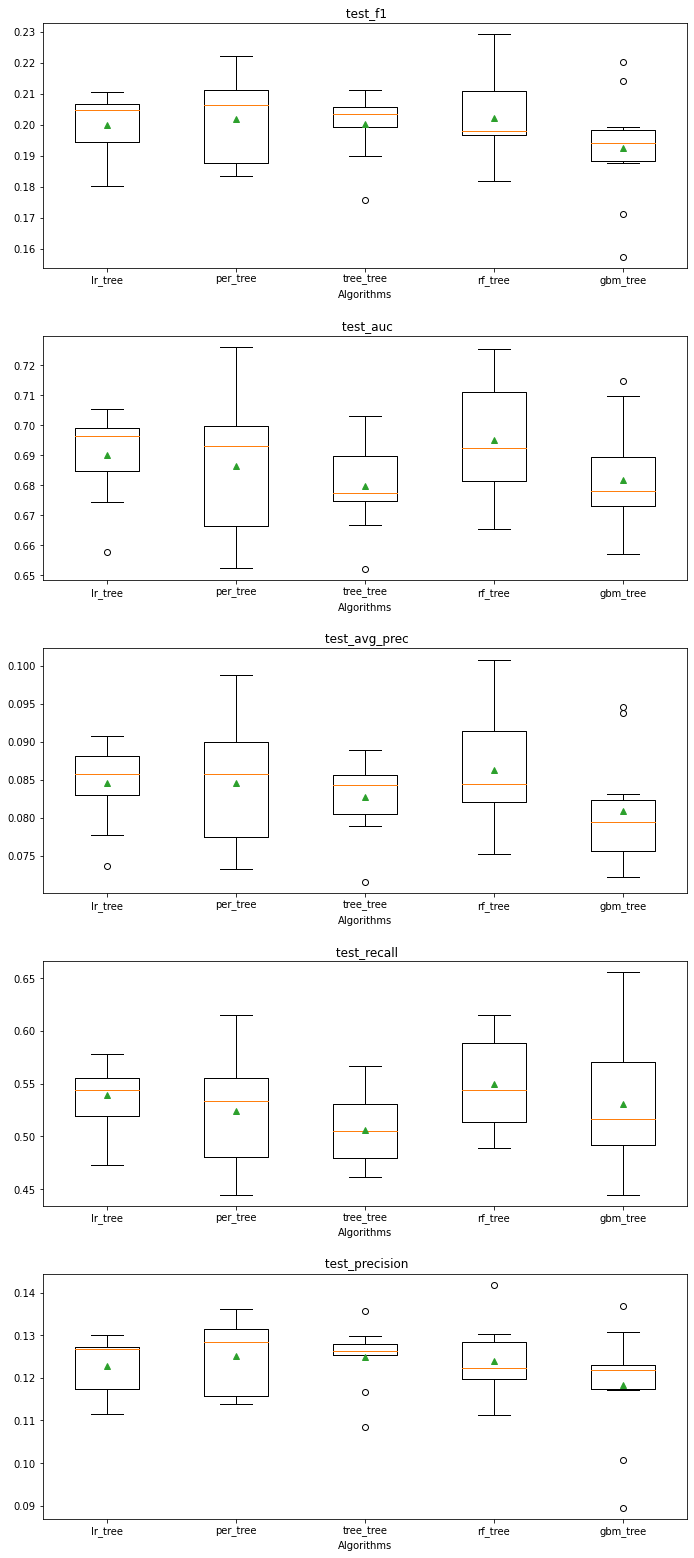

In [ ]:
models = get_models()
plot_scores,metric_names,model_names = rfecv_comparision(models,X[rf_cols_to_keep_thresh],Y,score)
fig = rfecv_plot(plot_scores,model_names,metric_names)
df_results = create_rfecv_df(plot_scores,metric_names,model_names)

# RFECV using Shap

In [ ]:
!pip3 install shap==0.40

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 22.2 MB/s 
  Attempting uninstall: shap
    Found existing installation: shap 0.38.1
    Uninstalling shap-0.38.1:
      Successfully uninstalled shap-0.38.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
probatus 1.8.9 requires shap<0.39.0,>=0.38.1, but you have shap 0.40.0 which is incompatible.


In [ ]:
from probatus.feature_elimination import ShapRFECV

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
#     rfe = SequentialFeatureSelector(estimator=LogisticRegression(class_weight = 'balanced'),
#                                    direction = 'backward',
#                                    cv = StratifiedKFold(5),scoring = scorer_f1 )
    
#     model = DecisionTreeClassifier(class_weight = 'balanced')
#     models['lr_tree'] = Pipeline(steps=[('std', StandardScaler()),('s',rfe),('m',model)])
    # perceptron
#     rfe = SequentialFeatureSelector(estimator=Perceptron(class_weight = 'balanced'),
#                direction = 'backward',
#                 cv = StratifiedKFold(5),scoring = scorer_f1)
    
#     model = DecisionTreeClassifier(class_weight = 'balanced')
#     models['per_tree'] = Pipeline(steps=[('min-max', MinMaxScaler()),('s',rfe),('m',model)])
    # cart

    model = DecisionTreeClassifier(class_weight = 'balanced',random_state=123)
    models['tree'] = model
    # rf
    
    model = RandomForestClassifier(class_weight = 'balanced',random_state=123)
    models['rf'] = model
    
    #etrees
    model = ExtraTreesClassifier(class_weight = 'balanced',random_state=123)
    models['etree'] = model
    # gbm
    
    # model = GradientBoostingClassifier()
    # models['gbm'] = model
    return models

tree based SHAP feature Selection started..


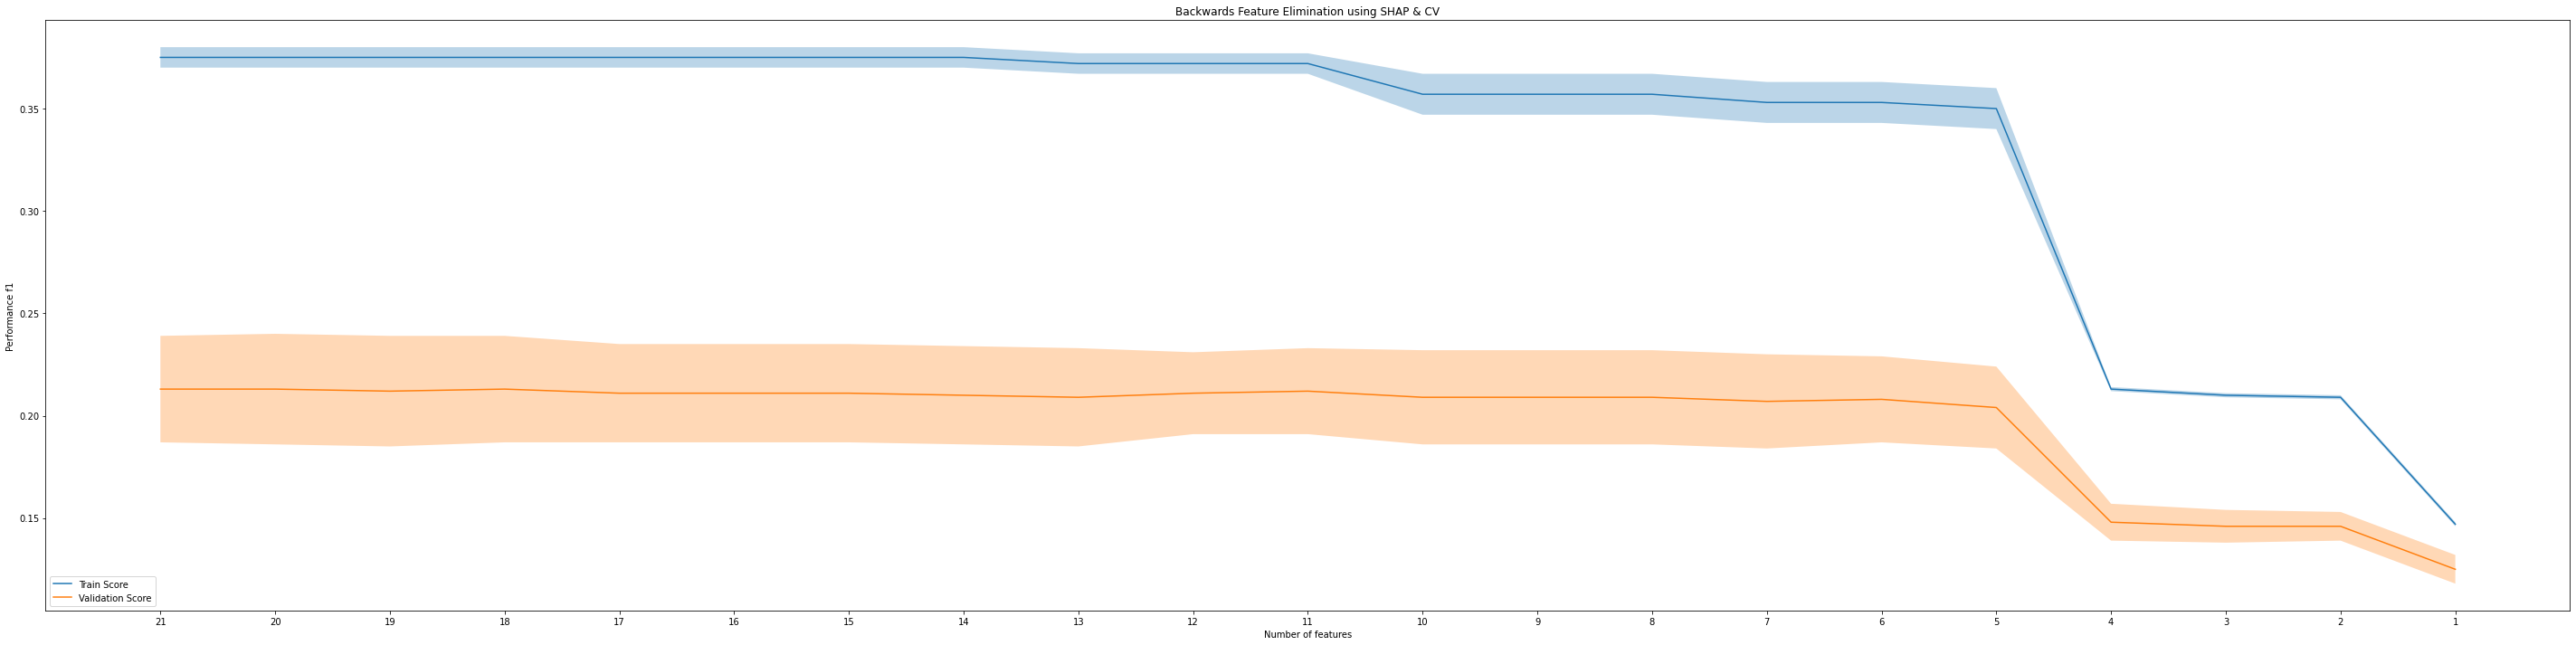

rf based SHAP feature Selection started..


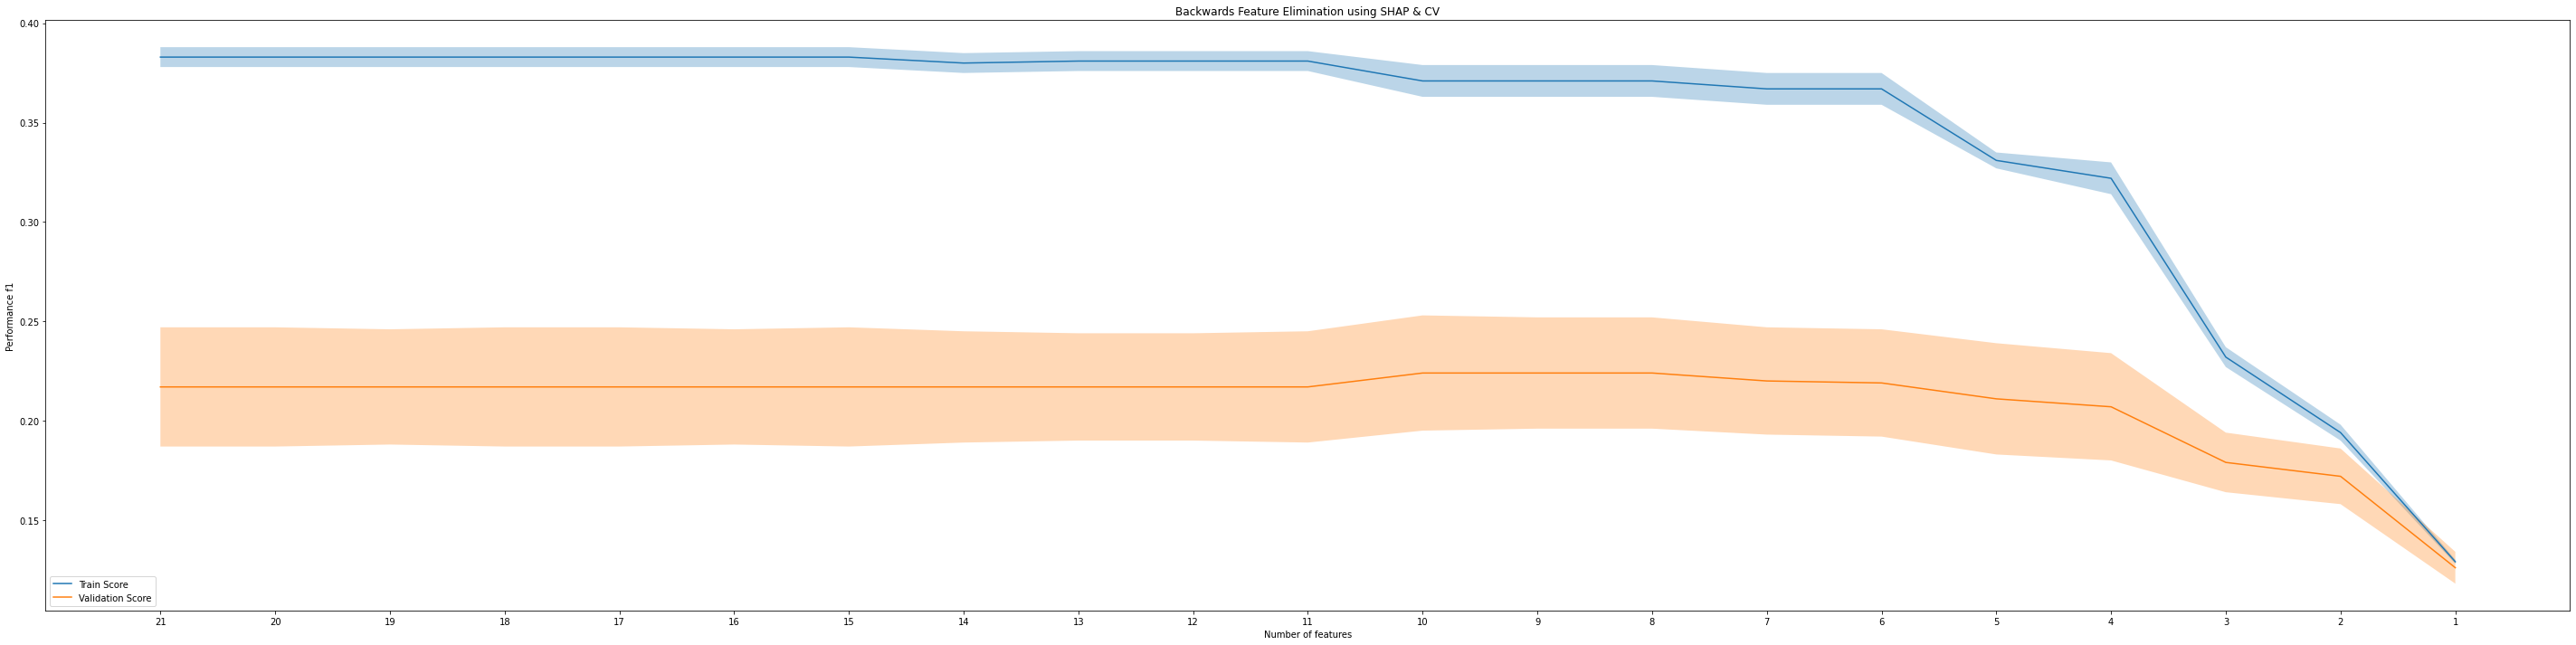

etree based SHAP feature Selection started..


In [ ]:
models = get_models()
for model_name, obj in models.items():
    print(f'{model_name} based SHAP feature Selection started..')
    shap_obj = ShapRFECV(obj,
            scoring = 'f1',
            cv = StratifiedKFold(10),
            n_jobs = -1,
            random_state=123)
    shap_fe_df = shap_obj.fit_compute(X = X,
                                        y = Y,
                                        column_names = X.columns,
                                        check_additivity=False)
    
    fig = shap_obj.plot(figsize = (50,12))
    fig.figure.savefig(f'/content/drive/MyDrive/Colab Notebooks/{model_name}_shap_imp.png')
    shap_fe_df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/{model_name}_shap_imp.csv',index=False)

# Noisy Features

In [4]:
!pip3 install featexp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd

In [7]:
from featexp import get_univariate_plots, get_trend_stats
shap_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rf_shap_imp.csv')


In [8]:
shap_features

,num_features,features_set,eliminated_features,train_metric_mean,train_metric_std,val_metric_mean,val_metric_std
0,21,"['var15', 'ind_var13_0', 'ind_var30', 'num_var...",['num_meses_var8_ult3'],0.383,0.005,0.217,0.030
1,20,"['num_var35', 'saldo_var5', 'num_meses_var5_ul...",['saldo_medio_var12_ult1'],0.383,0.005,0.217,0.030
2,19,"['num_var35', 'saldo_var5', 'saldo_medio_var5_...",['saldo_var13'],0.383,0.005,0.217,0.029
3,18,"['num_var35', 'saldo_var5', 'num_meses_var5_ul...",['ind_var43_recib_ult1'],0.383,0.005,0.217,0.030
4,17,"['num_var35', 'saldo_var5', 'saldo_medio_var5_...",['ind_var13_0'],0.383,0.005,0.217,0.030
5,16,"['num_var35', 'saldo_var5', 'num_meses_var5_ul...",['saldo_var5'],0.383,0.005,0.217,0.029
6,15,"['num_var35', 'saldo_medio_var5_ult1', 'num_me...",['num_var30_0'],0.383,0.005,0.217,0.030
7,14,"['saldo_var42', 'num_var35', 'saldo_var30', 'v...",['saldo_var42'],0.380,0.005,0.217,0.028
8,13,"['num_var35', 'saldo_medio_var5_hace3', 'var15...",['saldo_medio_var5_ult1'],0.381,0.005,0.217,0.027
9,12,"['num_var35', 'saldo_var30', 'var15', 'num_var...",['ind_var30'],0.381,0.005,0.217,0.027


In [15]:


shap_feats = shap_features[shap_features.num_features==3].features_set
shap_feats = eval(shap_feats.values[0])
shap_feats


['var36', 'var15', 'num_var35']

In [79]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3,stratify=Y,random_state = 123)

In [88]:
get_trend_stats(data=pd.concat([x_train,y_train],axis=1), target_col='TARGET', data_test=pd.concat([x_test,y_test],axis=1))

Returning stats for all numeric features


,Feature,Trend_changes,Trend_changes_test,Trend_correlation
0,var15,1,3,0.975
1,imp_op_var39_ult1,1,1,0.880
2,ind_var13_0,0,0,1.000
3,ind_var30,0,0,1.000
4,num_var4,1,1,0.990
5,num_var5,1,1,0.916
6,num_var13_0,0,0,1.000
7,num_op_var41_ult3,1,1,0.904
8,num_var30_0,0,0,1.000
9,num_var30,0,0,1.000


## Correlation Plot

In [90]:


def plot_correlation(X):
    corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    corr_linkage = hierarchy.ward(corr)
    dendro = hierarchy.dendrogram(
        corr_linkage, labels=X.columns, ax=ax1, leaf_rotation=90
    )
    dendro_idx = np.arange(0, len(dendro['ivl']))
    ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
    ax2.set_xticks(dendro_idx)
    ax2.set_yticks(dendro_idx)
    ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
    ax2.set_yticklabels(dendro['ivl'])
    #sns.heatmap(X.corr(),annot = True,ax = ax3)
    fig.tight_layout()
    plt.show()



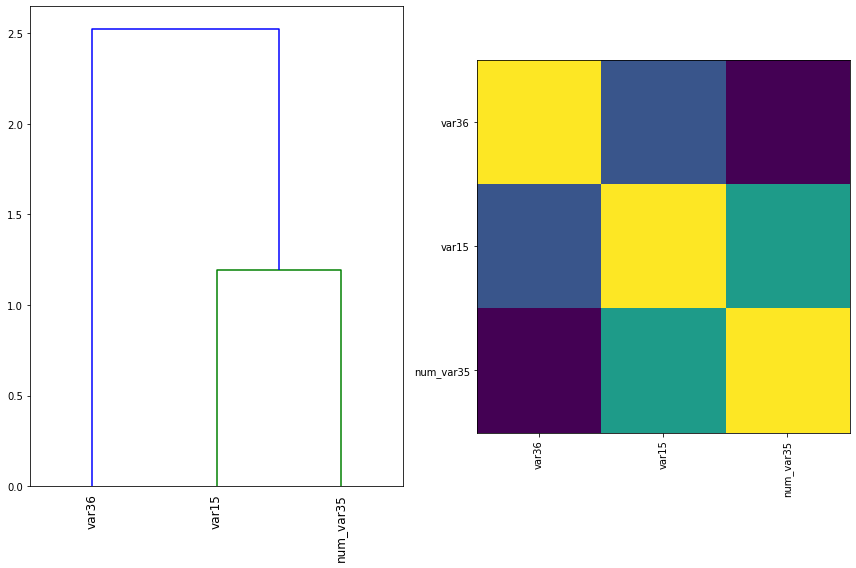

In [91]:
from scipy.cluster import hierarchy
plot_correlation(x_train[shap_feats])

In [92]:
df_corr = x_train[shap_feats].corr()
#df_corr.abs().unstack().sort_values(ascending = False).to_frame()
sol = (df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False)).to_frame().rename(columns = {0 :'correlation'})



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [93]:
sol.query('0.9<= correlation <=1')

,,correlation


In case there are correlated features that you wan to drop , use the below helper function. In our case,there are no correlated features with correlation between 0.9 and 1 , we will continue with the sam feature set.

In [ ]:

# col_names = ['level_0','level_1'] #put the features you want to drop from feature set.
# corr_cols = []
# for i in col_names:
#     corr_cols.extend(sol.query('0.9<= correlation <=1').reset_index()[i].values)
# corr_cols = set(corr_cols)
# print(len(corr_cols))
# print(corr_cols)

                                           Plots for var36                                            
                                           Train data plots                                           


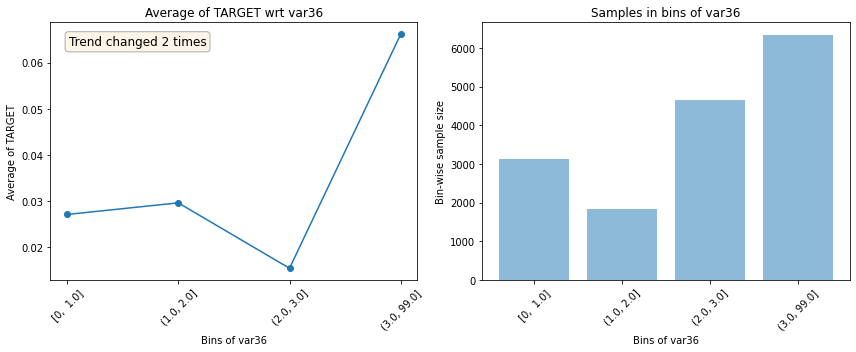

                                           Test data plots                                            


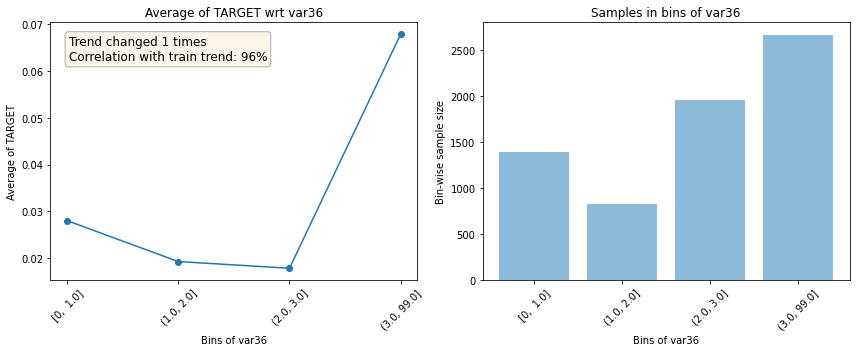

--------------------------------------------------------------------------------------------------------------


                                           Plots for var15                                            
                                           Train data plots                                           


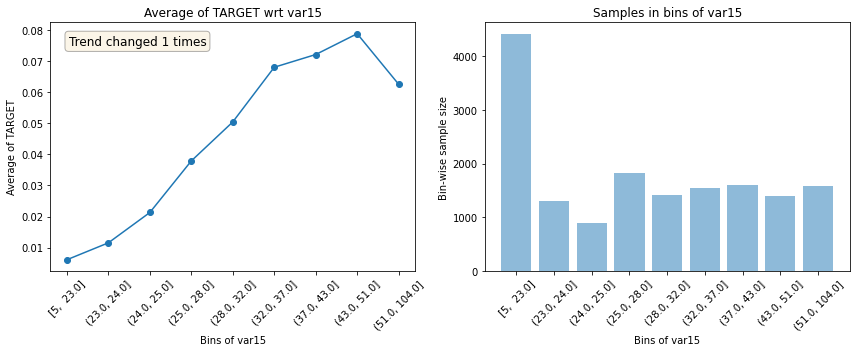

                                           Test data plots                                            


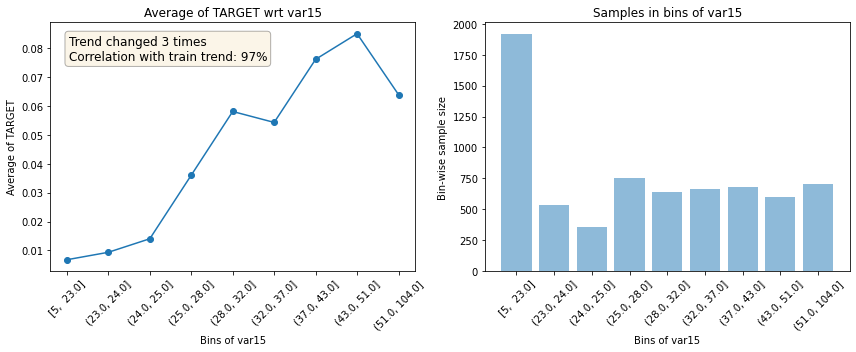

--------------------------------------------------------------------------------------------------------------


                                         Plots for num_var35                                          
                                           Train data plots                                           


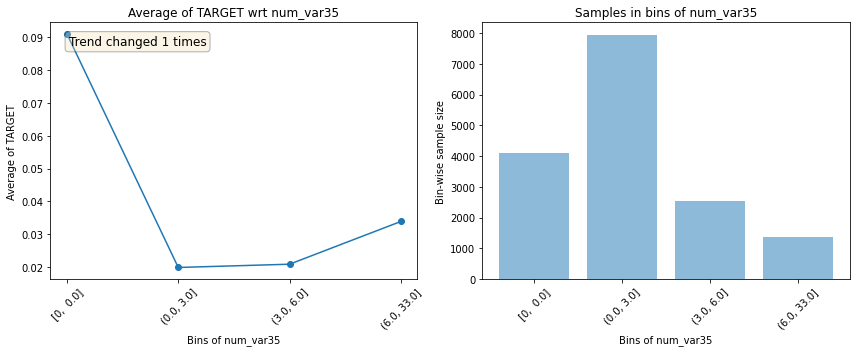

                                           Test data plots                                            


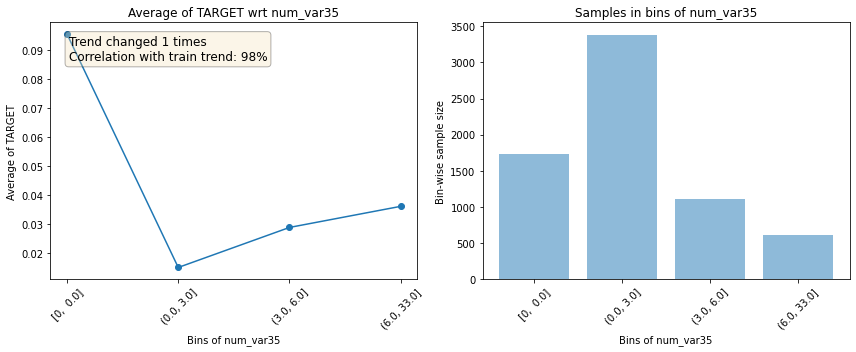

--------------------------------------------------------------------------------------------------------------




In [95]:
get_univariate_plots(data=pd.concat([x_train,y_train],axis=1), target_col='TARGET', data_test=pd.concat([x_test,y_test],axis=1), features_list=shap_feats)


We can drop any feature where the correlation between the train and the test is below a certian threshold as that would drop the noisy features from our dataset.As in our case the correlation is greater than 0.95 , we will continue with these features.

# Interactions

In [96]:


!pip install xgbfir
!pip3 install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 4.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [97]:
import xgboost as xgb
import xgbfir


In [99]:
# doing all the XGBoost magic
xgb_cmodel = xgb.XGBClassifier().fit(x_train[shap_feats],y_train)

# saving to file with proper feature names
xgbfir.saveXgbFI(xgb_cmodel, feature_names=shap_feats, OutputXlsxFile='/content/drive/MyDrive/Colab Notebooks/exp10FI.xlsx')


Refer https://github.com/limexp/xgbfir for more details on how we can interpret these values.

In [101]:
pd.read_excel('/content/drive/MyDrive/Colab Notebooks/exp10FI.xlsx',sheet_name=0)

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
0,var15,2371.351,421,195.299,0.464,5.633,1539.264,1,1,1,2,2,1,1.333,50.717,1.425
1,num_var35,1313.608,133,64.010,0.481,9.877,988.880,2,2,2,1,1,2,1.667,46.977,1.098
2,var36,184.912,87,32.453,0.373,2.125,106.844,3,3,3,3,3,3,3.000,52.908,1.563


In [102]:
pd.read_excel('/content/drive/MyDrive/Colab Notebooks/exp10FI.xlsx',sheet_name=1)

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
0,num_var35|var15,5593.068,253,75.903,0.300,22.107,2333.767,1,1,1,5,1,1,1.667,40.743,1.565
1,var15|var15,1222.025,130,65.271,0.502,9.400,257.694,2,2,2,1,4,3,2.333,62.962,1.608
2,var15|var36,918.864,111,33.274,0.300,8.278,474.539,3,3,3,6,5,2,3.667,56.640,1.730
3,num_var35|var36,581.904,36,12.235,0.340,16.164,219.937,4,4,4,4,2,4,3.667,48.694,1.778
4,num_var35|num_var35,56.664,6,2.961,0.493,9.444,22.151,5,5,5,2,3,5,4.167,53.667,1.833
5,var36|var36,9.891,5,2.118,0.424,1.978,3.290,6,6,6,3,6,6,5.500,79.600,2.000


In [103]:
pd.read_excel('/content/drive/MyDrive/Colab Notebooks/exp10FI.xlsx',sheet_name=2)

,Interaction,Gain,FScore,wFScore,Average wFScore,Average Gain,Expected Gain,Gain Rank,FScore Rank,wFScore Rank,Avg wFScore Rank,Avg Gain Rank,Expected Gain Rank,Average Rank,Average Tree Index,Average Tree Depth
0,num_var35|var15|var15,5749.632,171,33.483,0.196,33.624,1030.468,1,1,1,6,2,1,2.000,42.895,2
1,num_var35|var15|var36,1807.717,53,14.592,0.275,34.108,673.723,2,3,3,4,1,2,2.500,47.226,2
2,var15|var15|var36,946.752,60,13.584,0.226,15.779,328.633,3,2,4,5,4,3,3.500,58.317,2
3,num_var35|num_var35|var15,170.649,10,3.117,0.312,17.065,60.910,4,5,5,3,3,5,4.167,66.400,2
4,var15|var15|var15,151.272,40,24.848,0.621,3.782,76.449,5,4,2,2,5,4,3.667,69.925,2
5,var15|var36|var36,14.467,5,0.581,0.116,2.893,2.362,6,6,7,7,6,6,6.333,75.800,2
6,num_var35|var36|var36,2.415,2,1.557,0.779,1.208,1.880,7,7,6,1,7,7,5.833,88.000,2


In [104]:
pd.read_excel('/content/drive/MyDrive/Colab Notebooks/exp10FI.xlsx',sheet_name=3)

,Interaction,Sum Leaf Values Left,Sum Leaf Values Right,Sum Leaf Covers Left,Sum Leaf Covers Right
0,num_var35|var15,-3.264,-0.928,18396.261,7808.251


In [67]:
X.columns

Index(['var15', 'imp_ent_var16_ult1', 'imp_op_var39_efect_ult3', 'ind_var5_0',
       'ind_var5', 'ind_var13_corto_0', 'ind_var13_largo', 'ind_var24',
       'ind_var30_0', 'ind_var30', 'ind_var39_0', 'ind_var41_0', 'num_var4',
       'num_var5_0', 'num_var5', 'num_var13', 'num_var26', 'num_op_var41_ult1',
       'num_var30_0', 'num_var30', 'num_var32_0', 'num_var33', 'num_var35',
       'num_var39_0', 'num_var41_0', 'num_var42_0', 'num_var42', 'saldo_var5',
       'saldo_var13_corto', 'saldo_var13', 'saldo_var30', 'saldo_var33',
       'saldo_var42', 'var36', 'delta_imp_aport_var13_1y3',
       'delta_imp_compra_var44_1y3', 'imp_aport_var13_ult1',
       'num_var7_recib_ult1', 'num_var22_hace2', 'num_meses_var5_ult3',
       'num_meses_var8_ult3', 'num_meses_var39_vig_ult3',
       'num_op_var41_comer_ult3', 'num_var43_emit_ult1',
       'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3',
       'saldo_medio_var12_ult1', 'saldo_

# Backward Elimination

In [60]:
from sklearn.feature_selection import SequentialFeatureSelector

In [70]:
#get a list of models to evaluate 
def get_models(): 
  models = dict() 
  # lr 
  rfe = SequentialFeatureSelector(estimator=LogisticRegression(class_weight = 'balanced'), direction = 'backward', cv = StratifiedKFold(10),scoring = scorer_f1 ) 
  model = DecisionTreeClassifier(class_weight = 'balanced') 
  models['lr_tree'] = Pipeline(steps=[('std', StandardScaler()),('s',rfe),('m',model)]) 
  # perceptron 
  rfe = SequentialFeatureSelector(estimator=Perceptron(class_weight = 'balanced'), direction = 'backward', cv = StratifiedKFold(10),scoring = scorer_f1) 
  model = DecisionTreeClassifier(class_weight = 'balanced') 
  models['per_tree'] = Pipeline(steps=[('min-max', MinMaxScaler()),('s',rfe),('m',model)]) 
  # cart 
  rfe = SequentialFeatureSelector(estimator=DecisionTreeClassifier(class_weight = 'balanced'), direction = 'backward', cv = StratifiedKFold(10),scoring = scorer_f1) 
  model = DecisionTreeClassifier(class_weight = 'balanced') 
  models['tree_tree'] = Pipeline(steps=[('s',rfe),('m',model)]) 
  # rf 
  rfe = SequentialFeatureSelector(estimator=RandomForestClassifier(class_weight = 'balanced',criterion ='entropy'), direction = 'backward', cv = StratifiedKFold(10),scoring = scorer_f1) 
  model = DecisionTreeClassifier(class_weight = 'balanced') 
  models['rf_tree'] = Pipeline(steps=[('s',rfe),('m',model)]) 
  # gbm 
  rfe = SequentialFeatureSelector(estimator=GradientBoostingClassifier(), direction = 'backward', cv = StratifiedKFold(10),scoring = scorer_f1) 
  model = DecisionTreeClassifier(class_weight = 'balanced') 
  models['gbm_tree'] = Pipeline(steps=[('s',rfe),('m',model)]) 
  return models

def evaluate_model(model, X, y,scoring = 'accuracy'):
    cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=1)
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1,return_estimator = True)
    return scores


RFECV feature selection starting with lr_tree
RFECV feature selection starting with per_tree
RFECV feature selection starting with tree_tree
RFECV feature selection starting with rf_tree
RFECV feature selection starting with gbm_tree


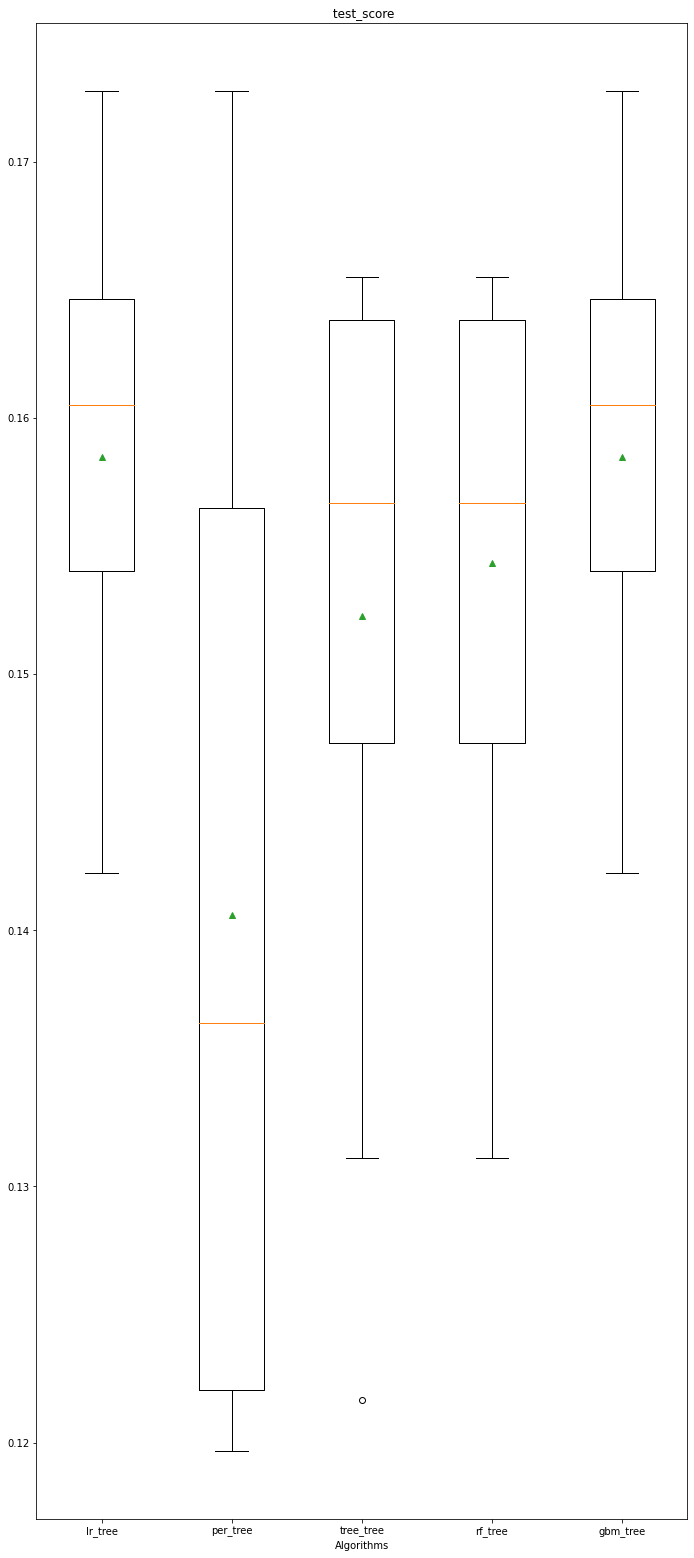

In [76]:
models = get_models() 
plot_scores,metric_names,model_names = rfecv_comparision(models,X[['var36', 'var15', 'num_var35']],Y,'f1') 
fig = rfecv_plot(plot_scores,model_names,metric_names) 
df_results = create_rfecv_df(plot_scores,metric_names,model_names) 

## IMBALANCED DATASET

IID process

A collection of random variables is independent and identically distributed if each random variable has the same probability distribution as the others and all are mutually independent

In case of highly imbalanced dataset, the train test split might not follow IID principle in the input features. FOr eg. For a partiular categorical feature which has [2,3,4,5] as categories ,in case of train and test split the train set might have all the categories but test set was able to capture just a few,say  [2,3,4] only. In this case , test set will never have category 5 which breaks the IID principle.

In such cases, better to check the results at each cross validation fold of the above mentioned feature selection techniques for better interpretation.s

### Check IID in Split Dataset

Checking the distribution of var15 before splitting and after splitting in train and test set.

In [ ]:
def get_split_info(X,Y,n_splits=5,test_size=0.2,random_state=123):
    
    sss = StratifiedKFold(n_splits =10)

#     sss = StratifiedShuffleSplit(n_splits=n_splits,
#                                  test_size=test_size,
#                                  random_state=random_state)
    sss.get_n_splits(X, Y)
    dataset_info = dict()
    for i, indexes in enumerate(sss.split(X, Y)):
        print("TRAIN:", len(indexes[0]), "TEST:", len(indexes[1]))
        dataset_info[str(i)] = {'train':indexes[0],'test': indexes[1]}
        #X_train, X_test = X.iloc[indexes[0],:], X.iloc[indexes[1],:]
        #y_train, y_test = Y[indexes[0]], Y[indexes[1]]
    return dataset_info

In [ ]:
dataset_info = get_split_info(X,Y.values)

TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280


In [ ]:
def generate_dist_plots(X =X ,dataset = None, f_name = None,label_name = None):
    #  Numerical or Categorical Data
    a = 10  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter
    fig = plt.figure(figsize=(15,8))
    sns.histplot(x = X[f_name],
             multiple = 'stack',
             hue = X[label_name]).set(title = f'{f_name} Distribution before splitting (n = {X.shape[0]}))');
    fig = plt.figure(figsize=(30,42))
    for i in range(0,len(dataset.keys())): # no of folds in split
        for index, j in enumerate(list(dataset[str(i)].keys())): # no of data subsets
            #print(f'fold {i}, dataset {j},index {index}')
            ax = plt.subplot(a, 2, c)
            data = X.iloc[dataset_info[str(i)][j],:]
            sns.histplot(data = data, x = f_name,
                 multiple = 'stack',
                 hue = label_name,ax = ax).set(title = f'Fold {i} {j} Dsitribution (n = {data.shape[0]})');
            c=c+1

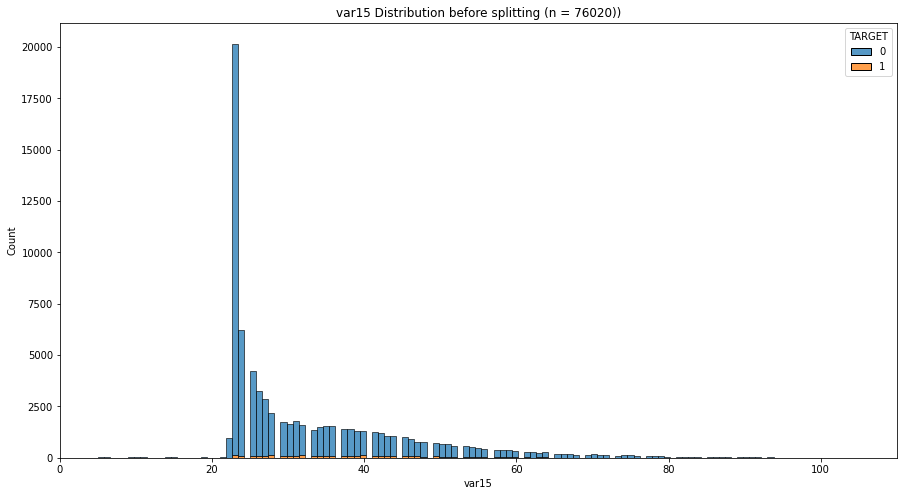

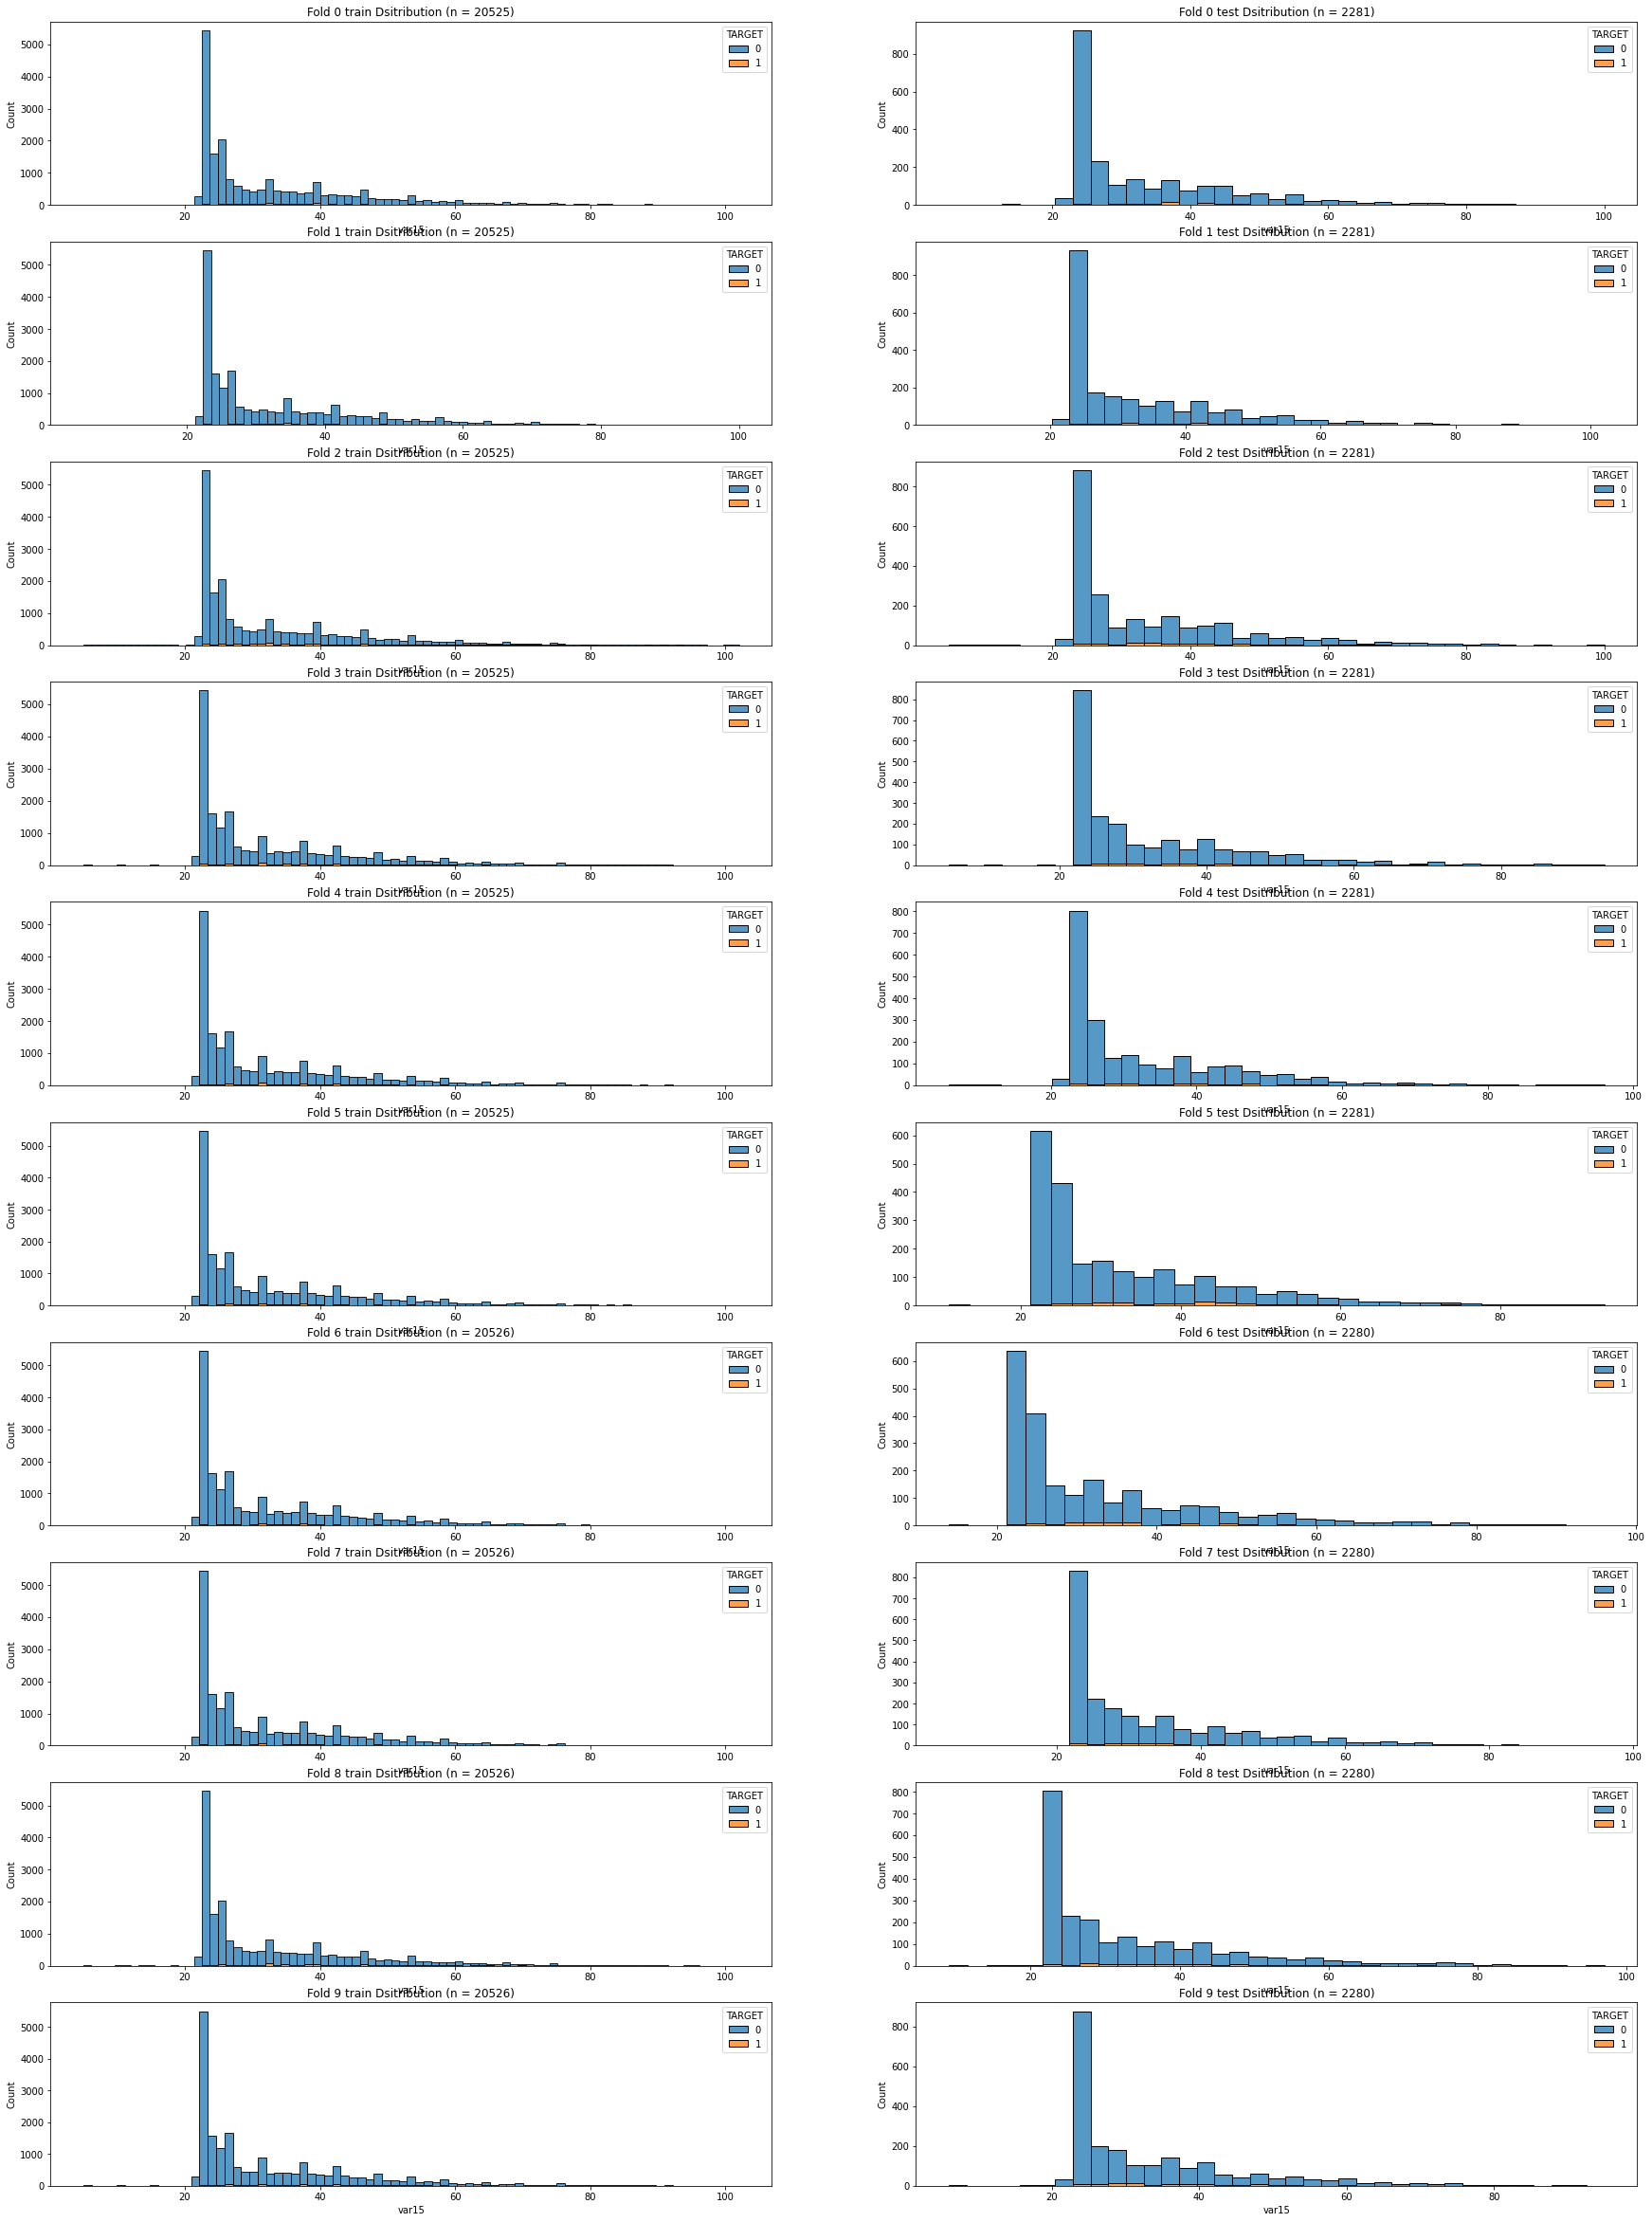

In [ ]:
generate_dist_plots(X = data[X.columns.tolist() + ['TARGET']],dataset = dataset_info,f_name = "var15",label_name = "TARGET")

# Permutation Importance

In [ ]:
def plot_permutation_importance(results = None,f_names = None,plot_fold_results =True):
    df_result = pd.DataFrame()
    no_of_cv_folds = len(results)
    for i in range(0,no_of_cv_folds):
        #print(i)
        df = pd.DataFrame({key: value for key , value in results[i].items() if key != 'importances'})
        df["fold"] = i+1
        df_result = pd.concat([df,df_result])
    idx_feat_map = {i:f_names[i] for i in range(0,len(f_names))}
    df_result['f_name'] = df_result.reset_index().rename(columns = {'index':'f_name'})['f_name'].map(idx_feat_map)
    df_result_agg = df_result.groupby(['f_name']).agg(np.mean)
    
    fig,ax = plt.subplots(figsize=(12, 6))
    
    plt.title(f'Avg CV Result of {no_of_cv_folds} Folds')
    plt.ylabel(f'Importance')
    plt.xticks(np.arange(len(df_result_agg.index)),list(df_result_agg.index),rotation = 90)
    plt.bar(np.arange(len(df_result_agg.index)),
           df_result_agg["importances_mean"].values,
          yerr= df_result_agg["importances_std"].values,
          align = 'center',alpha = 0.5, ecolor= 'black',capsize = 10)

    ax.yaxis.grid(True)
    plt.tight_layout()
    if plot_fold_results:
        #  Categorical Data
        a = 6  # number of rows
        b = 1  # number of columns
        c = 1  # initialize plot counter

        fig = plt.figure(figsize=(20,42))

        for i in np.arange(1,no_of_cv_folds+1):
            plt.subplot(a, b, c)
            plt.title(f'CV Result for Fold:{i}')
            plt.xticks(np.arange(len(f_names)),list(f_names),rotation = 10)
            #ax.set_xticklabels(list(X.columns))
            plt.bar(np.arange(len(f_names)),
               df_result.query(f'fold == {i}')["importances_mean"].values,
              yerr= df_result.query(f'fold == {i}')["importances_std"].values,
              align = 'center',alpha = 0.5, ecolor= 'black',capsize = 10)
            plt.grid()
            plt.margins(0.05)
          # Tweak spacing to prevent clipping of tick-labels
            #plt.subplots_adjust(hspace = 1.5)
            #ax.yaxis.grid(True)
            #sns.countplot(df[i])
            c = c + 1

        plt.show()
        

In [ ]:
def cal_p_importance(dataset_info,X,Y, model , scoring):
    results = []
    print(f'No of feats: {X.shape[1]}')
    for key, value in dataset_info.items():
        print("TRAIN:", len(value['train']), "TEST:", len(value['test']))
        #dataset_info[str(i)] = {'train':indexes[0],'test': indexes[1]}
        X_train, X_test = X.iloc[value['train'],:], X.iloc[value['test'],:]
        y_train, y_test = Y[value['train']], Y[value['test']]
        model.fit(X_train,y_train)
        tmp = permutation_importance(model,X_test ,
                                          y_test,
                                          scoring=scoring)
        results.append(tmp)
    return results

In [ ]:
#results = cal_p_importance(dataset_info,X,Y, model ,scorer_f1)

In [ ]:
def p_imp_over_folds(results,feat):
    df_result = pd.DataFrame()
    for i in range(0,len(results)):
        #print(i)
        df_p = pd.DataFrame({key: value for key , value in results[i].items() if key != 'importances'})
        df_p["fold"] = i+1
        df_result = pd.concat([df_p,df_result])
    idx_feat_map = {i:feat[i] for i in range(0,len(feat))}
    df_result['f_name'] = df_result.reset_index().rename(columns = {'index':'f_name'})['f_name'].map(idx_feat_map)
    df_result_agg = df_result.groupby(['f_name']).agg(np.mean).reset_index()
    df_result_agg['fold'] = 99
    df_result_agg = pd.concat([df_result.reset_index(drop=True),df_result_agg.reset_index(drop=True)],axis=0)
    return df_result_agg

In [ ]:
def plot_p_imp_per_fold_results(p_imp_df,X):
    no_folds = p_imp_df.fold.nunique()
    a = no_folds
    #  Categorical Data
    a = no_folds  # number of rows
    b = 1  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=(60,no_folds*8))

    for i in sorted(p_imp_df.fold.unique()):
        plt.subplot(a, b, c)
        plt.title(f'CV Result for Fold:{i}')
        plt.xticks(np.arange(len(X.columns)),list(X.columns),rotation = 90)
        #ax.set_xticklabels(list(X.columns))
        plt.bar(np.arange(len(X.columns)),
           p_imp_df.query(f'fold == {i}')["importances_mean"].values,
          yerr= p_imp_df.query(f'fold == {i}')["importances_std"].values,
          align = 'center',alpha = 0.5, ecolor= 'black',capsize = 10,orientation = u'vertical')
        plt.grid()
        plt.margins(0.05)
        plt.tight_layout(pad=5)
      # Tweak spacing to prevent clipping of tick-labels
        #plt.subplots_adjust(hspace = 1.5)
        #ax.yaxis.grid(True)
        #sns.countplot(df[i])
        c = c + 1
    #plt.show()
    return fig
    

In [ ]:
def permutation_importance_(dataset_info,X,y,model,scorer):
    results = cal_p_importance(dataset_info,X,y, model ,scorer)
    df_results = p_imp_over_folds(results,X.columns)
    fig = plot_p_imp_per_fold_results(df_results,X)
    return df_results, fig

No of feats: 50
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20525 TEST: 2281
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280
TRAIN: 20526 TEST: 2280


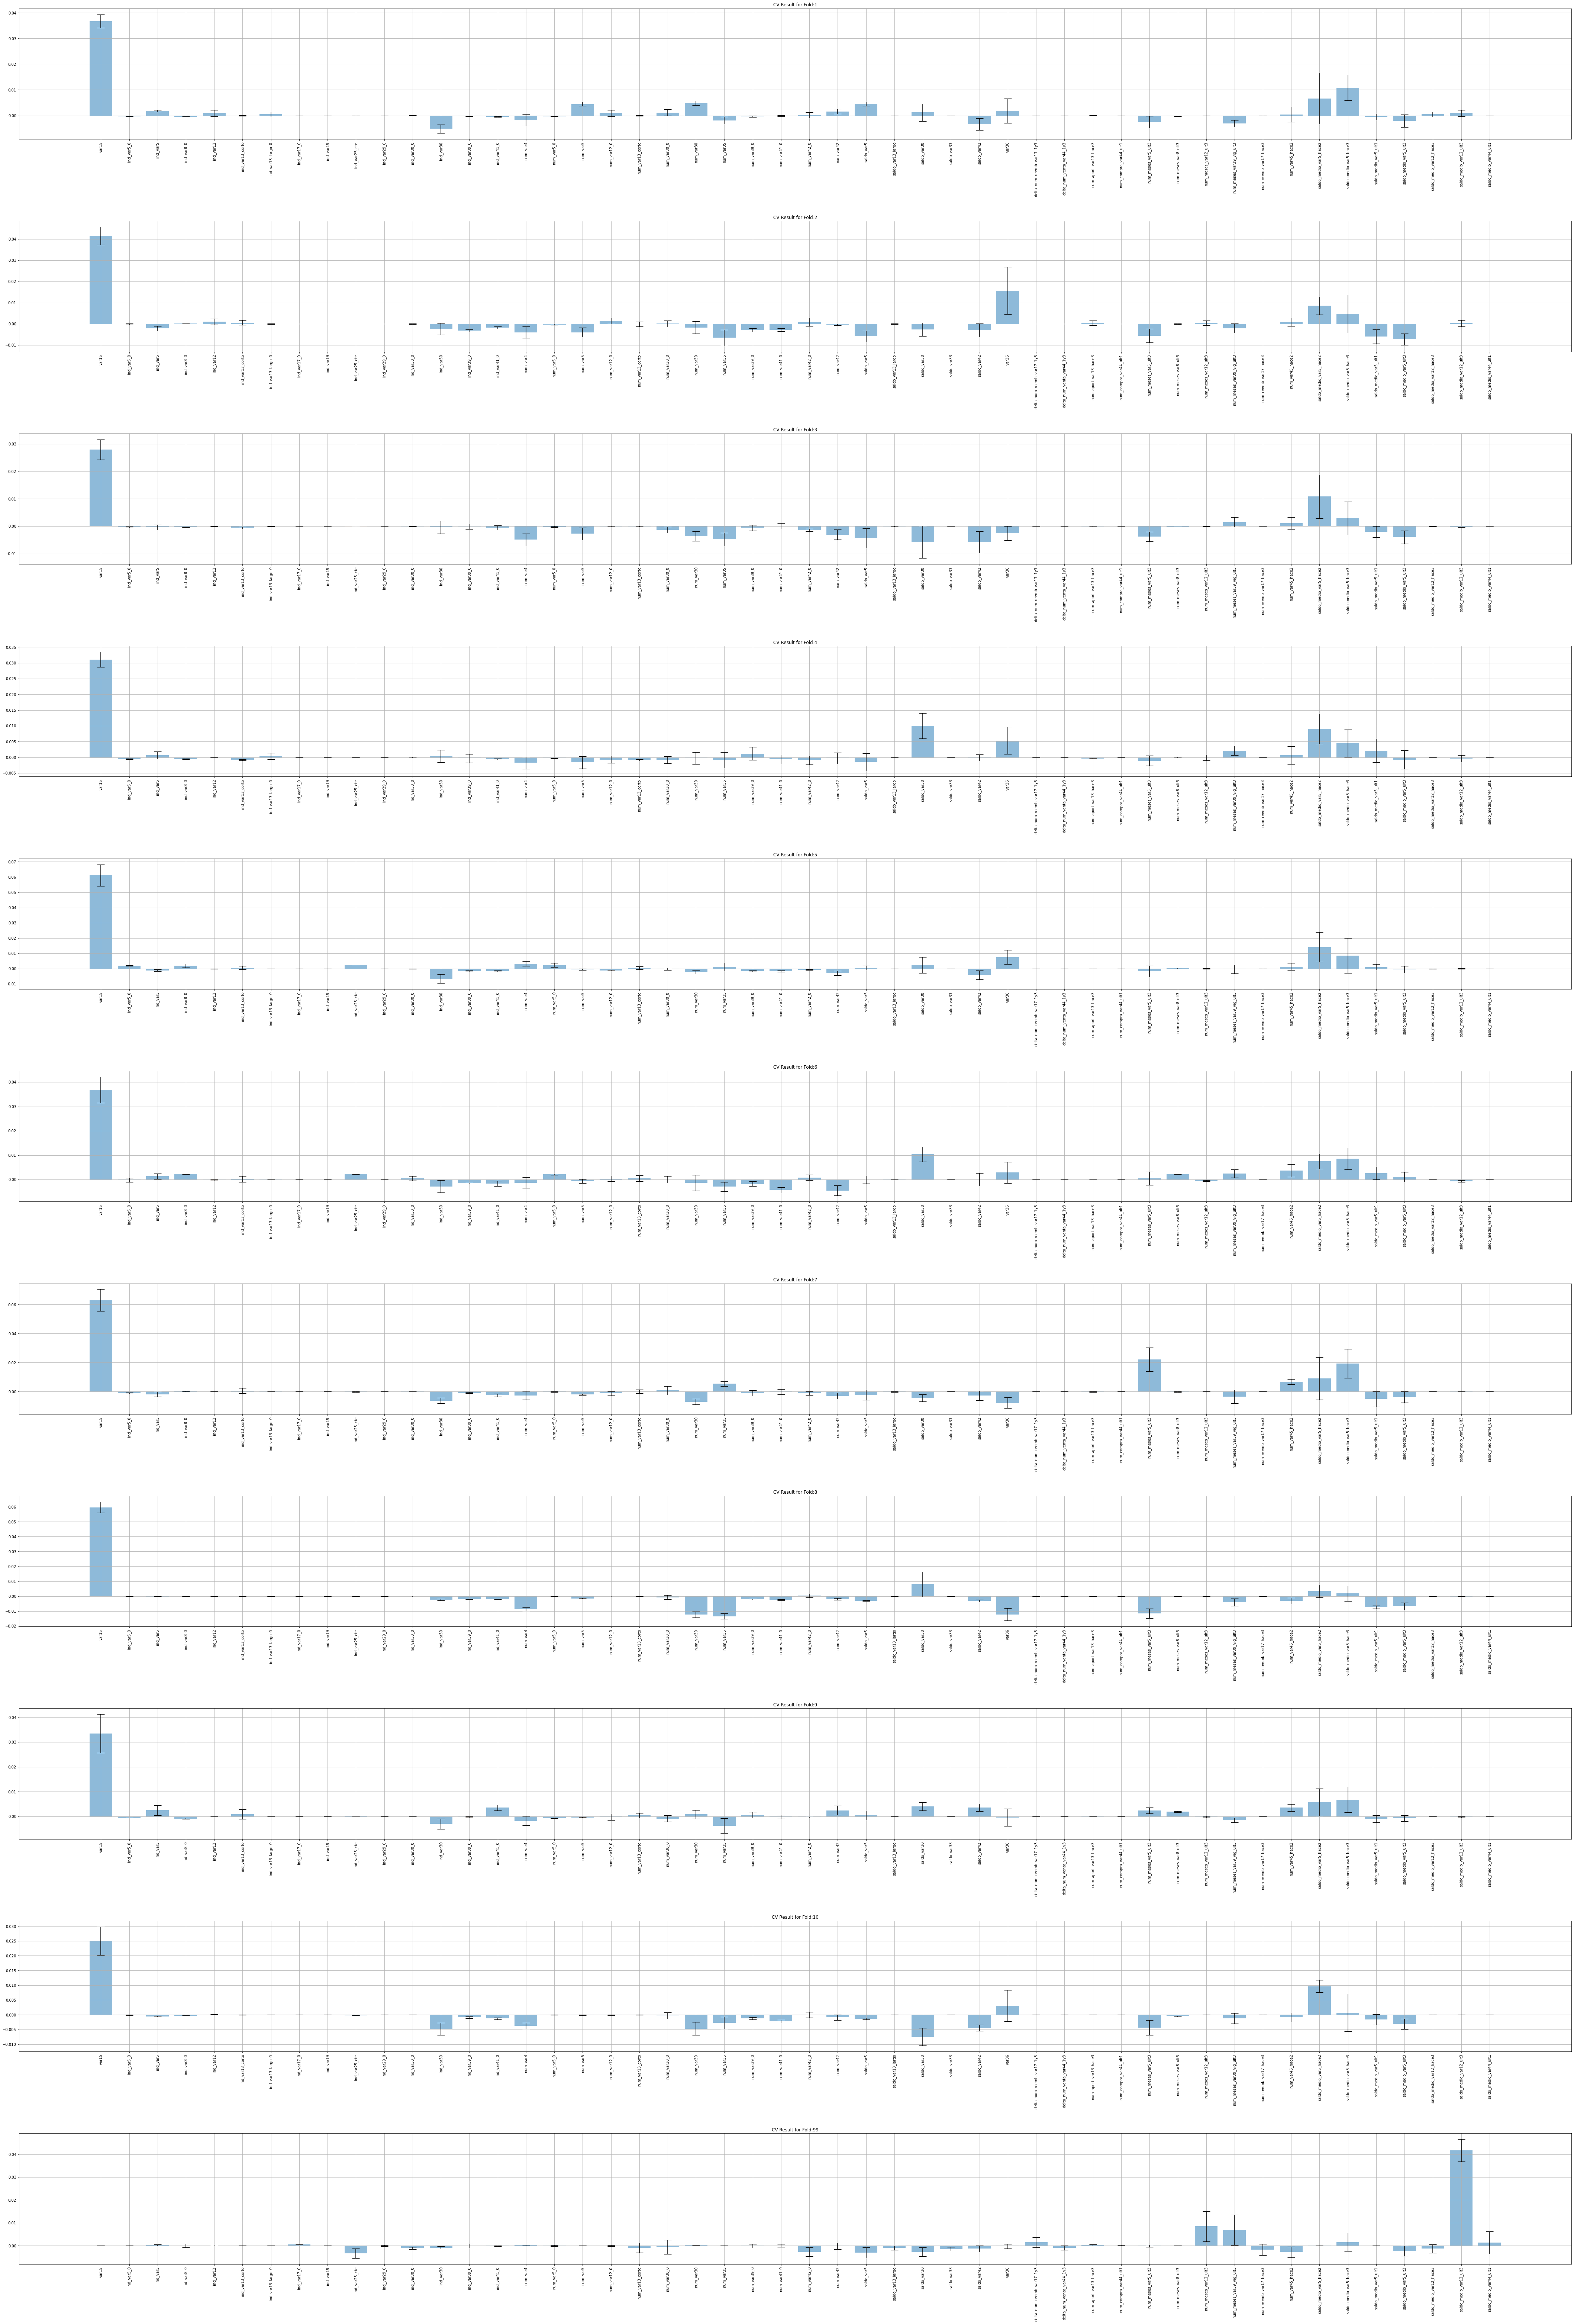

In [ ]:
df_results, fig = permutation_importance_(dataset_info,X,Y,model,scorer_avg_precision)

In [ ]:
df_results

,importances_mean,importances_std,fold,f_name
0,0.025,0.005,10,var15
1,-0.000,0.000,10,ind_var5_0
2,-0.001,0.000,10,ind_var5
3,-0.000,0.000,10,ind_var8_0
4,0.000,0.000,10,ind_var12
...,...,...,...,...
45,0.000,0.000,99,saldo_var33
46,-0.002,0.002,99,saldo_var42
47,-0.001,0.002,99,saldo_var5
48,0.042,0.005,99,var15


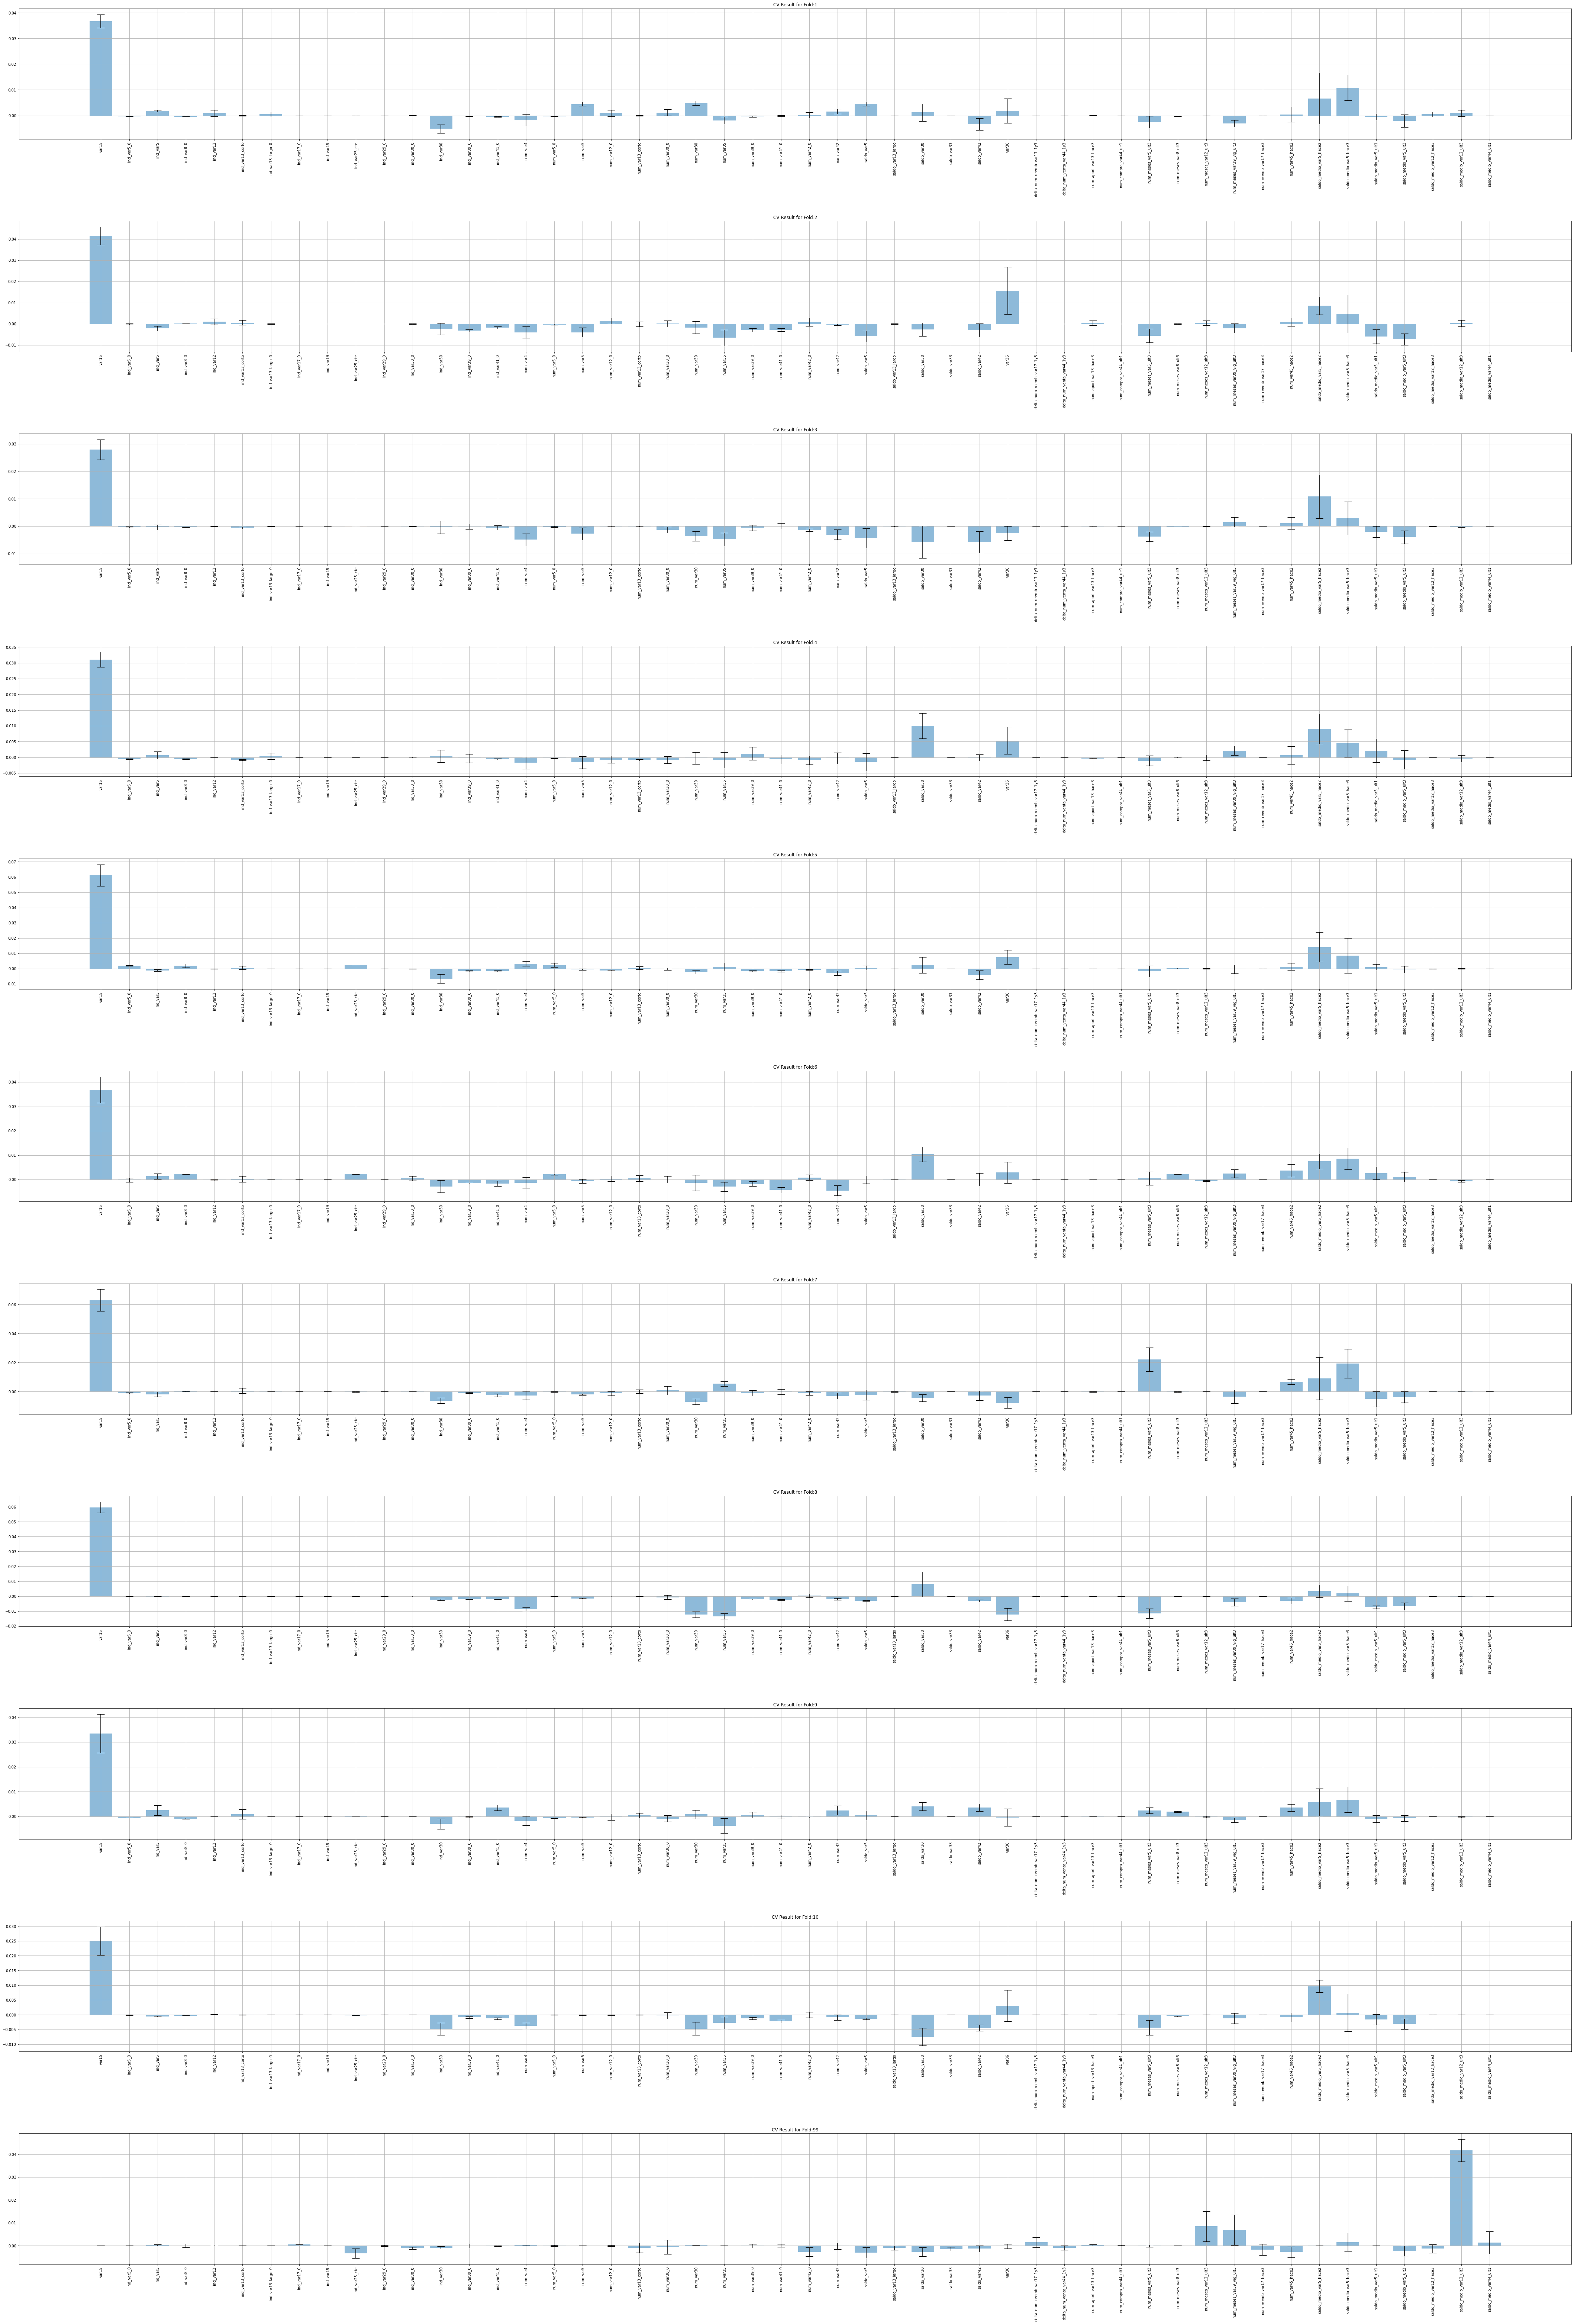

In [ ]:
fig

# Framework for Feature Engineering

In [7]:
![](images/FeatureEngineering.png)

/bin/bash: -c: line 0: syntax error near unexpected token `images/FeatureEngineering.png'
/bin/bash: -c: line 0: `[](images/FeatureEngineering.png)'
